In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
application_data_df = pd.read_csv(r"C:\Users\Harshita\Documents\application_data.csv")
prev_app_data_df = pd.read_csv(r"C:\Users\Harshita\Documents\previous_application.csv")

In [3]:
application_data_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
prev_app_data_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
application_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
application_data_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
prev_app_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [8]:
application_data_df.shape

(307511, 122)

In [9]:
prev_app_data_df.shape

(1670214, 37)

In [10]:
application_data_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [11]:
prev_app_data_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [12]:
application_data_missing=application_data_df.isna()
application_data_missing.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
application_data_num_missing=application_data_missing.sum()
application_data_num_missing

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [14]:
application_data_num_missing / len(application_data_df)

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
Length: 122, dtype: float64

In [15]:
(application_data_num_missing / len(application_data_df)*100).sort_values(ascending = False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [16]:
application_data_num_missing_per =(application_data_num_missing / len(application_data_df)*100).sort_values(ascending = False).head(30)
application_data_num_missing_per

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
FLOORSMIN_AVG               67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_AVG             66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
LANDAREA_AVG                59.376738
BASEMENTAREA_MEDI           58.515956
BASEMENTAREA_AVG            58.515956
BASEMENTAREA_MODE           58.515956
EXT_SOURCE_1                56.381073
NONLIVINGAREA_MODE          55.179164
NONLIVINGAREA_AVG           55.179164
NONLIVINGARE

In [17]:
application_data_num_missing_per = application_data_df.isnull().sum().sort_values(ascending=False)
application_data_num_missing_per = application_data_num_missing_per[application_data_num_missing_per.values > (0.40*len(application_data_df))]
len(application_data_num_missing_per)

49

In [18]:
a = list(application_data_num_missing_per.index.values)
application_data_df.drop(labels = a, axis = 1, inplace = True)

In [19]:
application_data_df.shape

(307511, 73)

In [20]:
prev_app_data_missing=prev_app_data_df.isna()
prev_app_data_missing.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,True,True,True,True,True


In [21]:
prev_app_data_num_missing=prev_app_data_missing.sum()
prev_app_data_num_missing

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [22]:
(prev_app_data_num_missing / len(prev_app_data_df)*100).sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [23]:
prev_app_data_num_missing_per = prev_app_data_df.isnull().sum().sort_values(ascending=False)
prev_app_data_num_missing_per = prev_app_data_num_missing_per[prev_app_data_num_missing_per.values > (0.40*len(prev_app_data_df))]
len(prev_app_data_num_missing_per)

11

In [24]:
a = list(prev_app_data_num_missing_per.index.values)
prev_app_data_df.drop(labels = a, axis = 1, inplace = True)

In [25]:
dr_cols =['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

dr_cols

['WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY']

In [26]:
prev_app_data_df.drop(labels=dr_cols,axis=1,inplace=True)

In [27]:
prev_app_data_df.shape

(1670214, 22)

In [28]:
application_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [29]:
flag_col = []

for col in application_data_df.columns:
    if col.startswith("FLAG"):
        flag_col.append(col)
flag_col

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [30]:
len(flag_col)

28

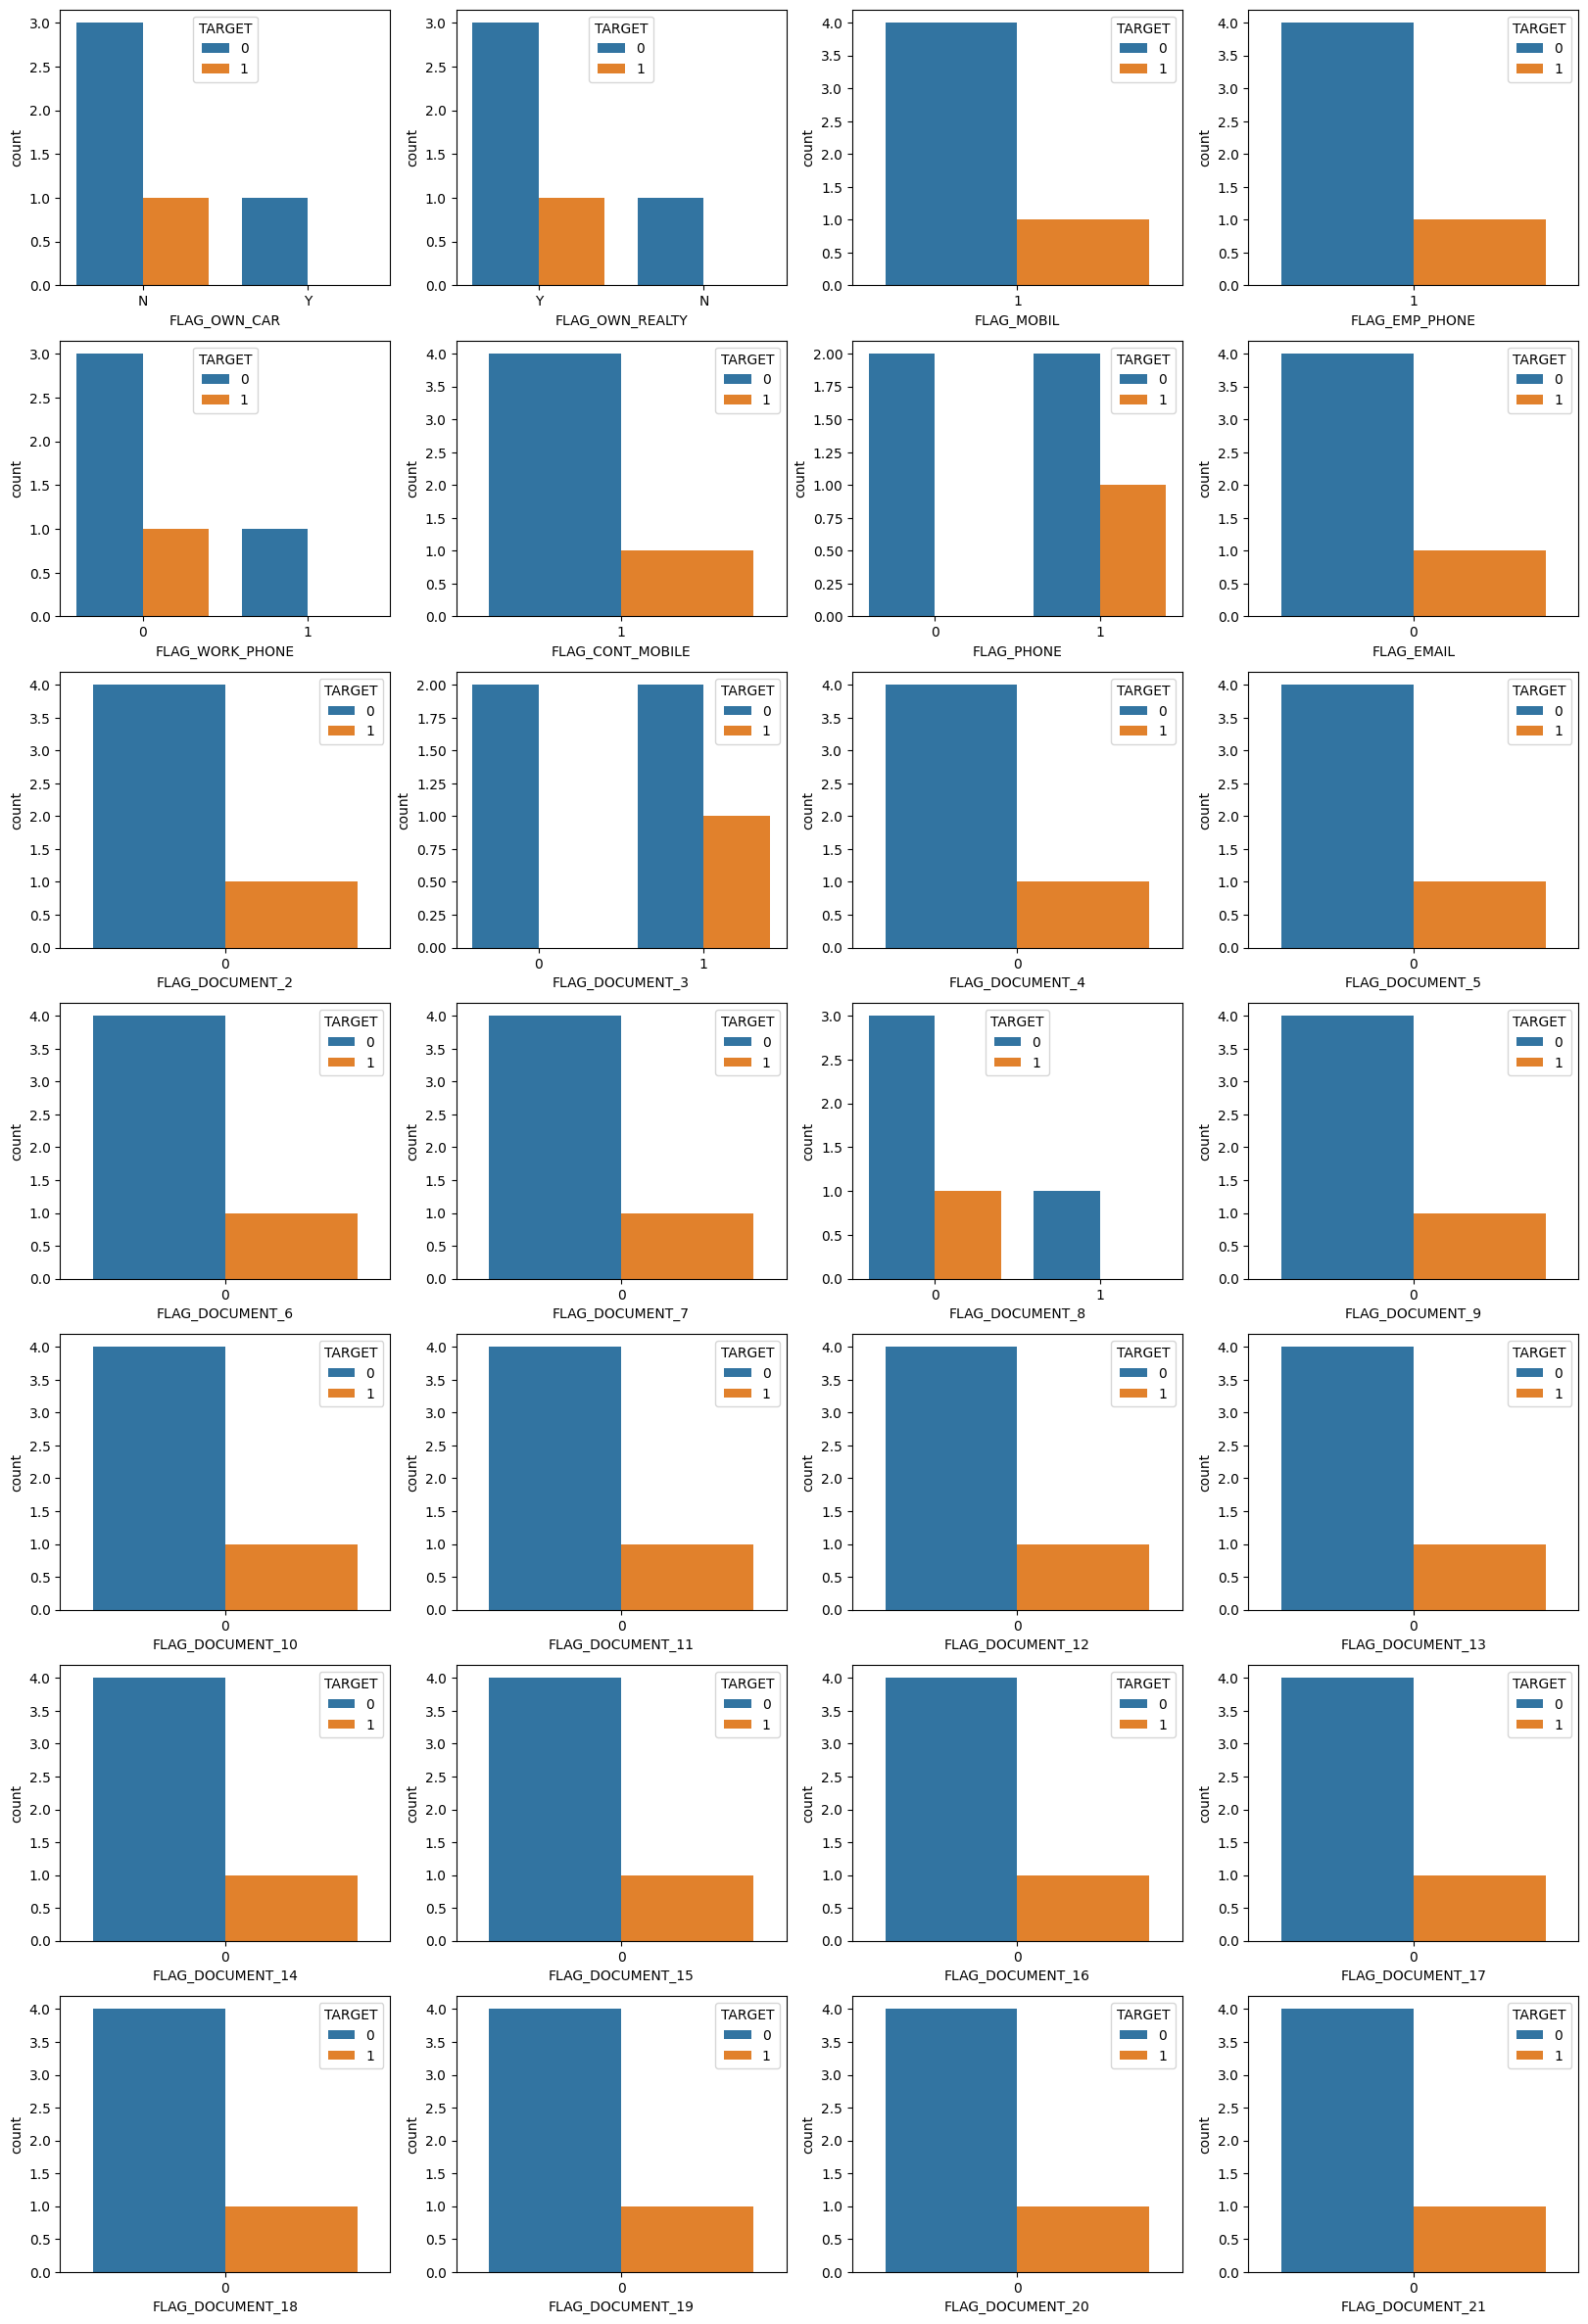

In [31]:
plt.figure(figsize=(20,30))
for i,col in enumerate(flag_col):
    plt.subplot(7,4,i+1)
    sns.countplot(data=application_data_df[flag_col+['TARGET']].head(), x = col, hue = 'TARGET')

In [32]:
flag_col_1 = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE',
 'FLAG_EMAIL', 'TARGET']

corr_df = application_data_df[flag_col_1]
corr_df

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
0,N,Y,1,1,0,1,1,0,1
1,N,N,1,1,0,1,1,0,0
2,Y,Y,1,1,1,1,1,0,0
3,N,Y,1,1,0,1,0,0,0
4,N,Y,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
307506,N,N,1,1,0,1,0,0,0
307507,N,Y,1,0,0,1,1,0,0
307508,N,Y,1,1,0,1,0,1,0
307509,N,Y,1,1,0,1,0,0,1


In [33]:
corr_df.groupby(['FLAG_OWN_CAR']).size()

FLAG_OWN_CAR
N    202924
Y    104587
dtype: int64

In [34]:
corr_df['FLAG_OWN_CAR'] = corr_df['FLAG_OWN_CAR'].replace({'N':0,'Y': 1})
corr_df['FLAG_OWN_REALTY'] = corr_df['FLAG_OWN_REALTY'].replace({'N':0, 'Y': 1})

corr_df.groupby(['FLAG_OWN_CAR']).size()
corr_df.groupby(['FLAG_OWN_REALTY']).size()

C:\Users\Harshita\AppData\Local\Temp\ipykernel_17876\3476285851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['FLAG_OWN_CAR'] = corr_df['FLAG_OWN_CAR'].replace({'N':0,'Y': 1})
C:\Users\Harshita\AppData\Local\Temp\ipykernel_17876\3476285851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['FLAG_OWN_REALTY'] = corr_df['FLAG_OWN_REALTY'].replace({'N':0, 'Y': 1})


FLAG_OWN_REALTY
0     94199
1    213312
dtype: int64

<AxesSubplot:>

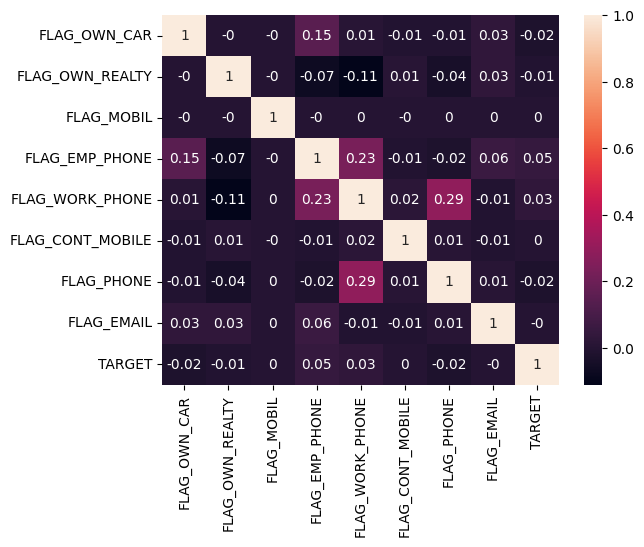

In [35]:
corr_df_1 = round(corr_df.corr(),2)
sns.heatmap(corr_df_1, annot = True)

In [36]:
application_data_df.drop(labels = flag_col, axis = 1, inplace =  True)

In [37]:
application_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   AMT_GOODS_PRICE              307233 non-null  float64
 9   NAME_TYPE_SUITE              306219 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

<AxesSubplot:>

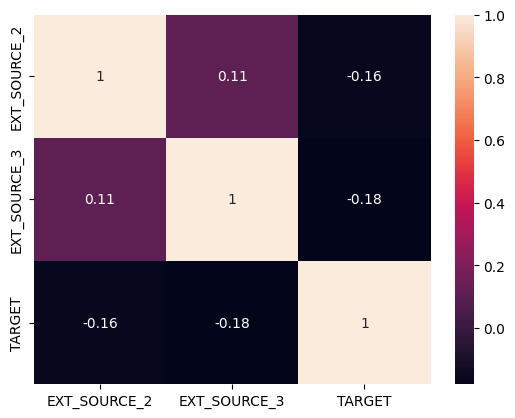

In [38]:
sns.heatmap(data=round(application_data_df[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2),annot = True)

In [39]:
application_data_df.drop(labels = ['EXT_SOURCE_2','EXT_SOURCE_3'],axis = 1, inplace = True)

In [40]:
application_data_df.shape

(307511, 43)

In [41]:
(application_data_df.isnull().sum().sort_values(ascending = False)/len(application_data_df)) * 100

OCCUPATION_TYPE                31.345545
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
HOUR_APPR_PROCESS_START         0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
SK_ID_CURR      

In [42]:
application_data_df.groupby('CNT_FAM_MEMBERS').size()

CNT_FAM_MEMBERS
1.0      67847
2.0     158357
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
11.0         1
12.0         2
13.0         1
14.0         2
15.0         1
16.0         2
20.0         2
dtype: int64

In [43]:
application_data_df['CNT_FAM_MEMBERS'].mode()

0    2.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [44]:
application_data_df['CNT_FAM_MEMBERS'] = application_data_df['CNT_FAM_MEMBERS'].fillna((application_data_df['CNT_FAM_MEMBERS'].mode()[0]))

In [45]:
application_data_df['CNT_FAM_MEMBERS'].isnull().sum()

0

In [46]:
application_data_df.groupby('OCCUPATION_TYPE').size()

OCCUPATION_TYPE
Accountants               9813
Cleaning staff            4653
Cooking staff             5946
Core staff               27570
Drivers                  18603
HR staff                   563
High skill tech staff    11380
IT staff                   526
Laborers                 55186
Low-skill Laborers        2093
Managers                 21371
Medicine staff            8537
Private service staff     2652
Realty agents              751
Sales staff              32102
Secretaries               1305
Security staff            6721
Waiters/barmen staff      1348
dtype: int64

In [47]:
application_data_df['OCCUPATION_TYPE'].mode()

0    Laborers
Name: OCCUPATION_TYPE, dtype: object

In [48]:
application_data_df['OCCUPATION_TYPE'] = application_data_df['OCCUPATION_TYPE'].fillna((application_data_df['OCCUPATION_TYPE'].mode()[0]))

In [49]:
application_data_df['OCCUPATION_TYPE'].isnull().sum()

0

In [50]:
application_data_df['NAME_TYPE_SUITE'].isnull().sum()

1292

In [51]:
application_data_df['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [52]:
application_data_df['NAME_TYPE_SUITE'] = application_data_df['NAME_TYPE_SUITE'].fillna((application_data_df['NAME_TYPE_SUITE'].mode()[0]))

In [53]:
application_data_df['NAME_TYPE_SUITE'].isnull().sum()

0

In [54]:
application_data_df['AMT_ANNUITY'].isnull().sum()

12

In [55]:
application_data_df['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [56]:
application_data_df['AMT_ANNUITY'] = application_data_df['AMT_ANNUITY'].fillna((application_data_df['AMT_ANNUITY'].mean()))

In [57]:
application_data_df['AMT_ANNUITY'].isnull().sum()

0

In [58]:
application_data_df['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [59]:
application_data_df['AMT_REQ_CREDIT_BUREAU_HOUR'].unique()

array([ 0., nan,  1.,  2.,  3.,  4.])

In [60]:
amt_col =  []

for col in application_data_df.columns:
    if col.startswith("AMT_REQ_CREDIT_BUREAU"):
        amt_col.append(col)

amt_col

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [61]:
for col in amt_col:
    application_data_df[col] = application_data_df[col].fillna((application_data_df[col].median()))

In [62]:
application_data_df[col].isnull().sum()

0

In [63]:
application_data_df.isnull().sum().sort_values()

SK_ID_CURR                        0
AMT_REQ_CREDIT_BUREAU_QRT         0
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
LIVE_REGION_NOT_WORK_REGION       0
REG_CITY_NOT_LIVE_CITY            0
REG_CITY_NOT_WORK_CITY            0
LIVE_CITY_NOT_WORK_CITY           0
ORGANIZATION_TYPE                 0
AMT_REQ_CREDIT_BUREAU_HOUR        0
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_WEEK        0
AMT_REQ_CREDIT_BUREAU_MON         0
CNT_FAM_MEMBERS                   0
OCCUPATION_TYPE                   0
REGION_RATING_CLIENT              0
DAYS_REGISTRATION                 0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
DAYS_ID_PUBLISH                   0
AMT_ANNUITY                       0
AMT_CREDIT                  

In [64]:
application_data_df['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [65]:
application_data_df['AMT_GOODS_PRICE'].agg(['min','max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [66]:
application_data_df['AMT_GOODS_PRICE'].mean()

538396.2074288895

In [67]:
 application_data_df['AMT_GOODS_PRICE'] = application_data_df['AMT_GOODS_PRICE'].fillna((application_data_df['AMT_GOODS_PRICE'].median()))

In [68]:
application_data_df['AMT_GOODS_PRICE'].isnull().sum()

0

In [69]:
application_data_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
days_col = []

for col in application_data_df.columns:
    if col.startswith("DAYS"):
        days_col.append(col)
days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [71]:
for col in days_col:
    application_data_df[col] = abs(application_data_df[col])

In [72]:
application_data_df.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
REG_REGION_NOT_WORK_REGION          2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
CODE_GENDER                         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
HOUR_APPR_PR

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

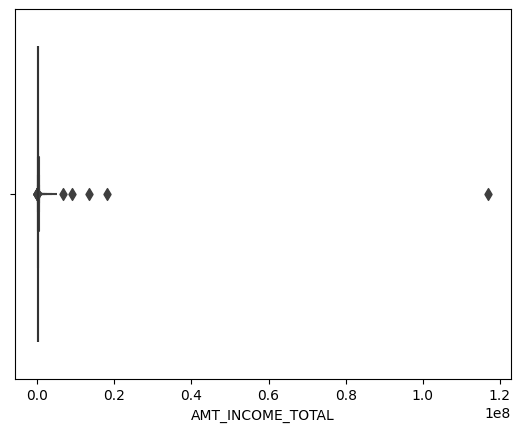

In [73]:
sns.boxenplot(data=application_data_df,x='AMT_INCOME_TOTAL')

<AxesSubplot:xlabel='AMT_CREDIT'>

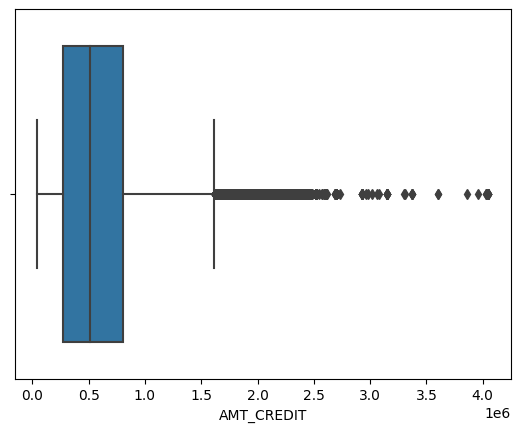

In [74]:

sns.boxplot(data=application_data_df,x='AMT_CREDIT')

<AxesSubplot:xlabel='AMT_ANNUITY'>

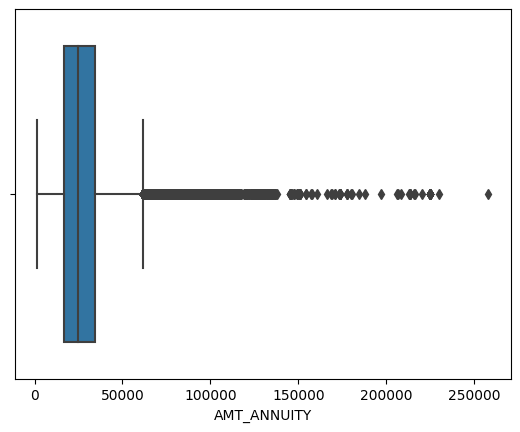

In [75]:
sns.boxplot(data=application_data_df,x='AMT_ANNUITY')

<AxesSubplot:xlabel='DAYS_BIRTH'>

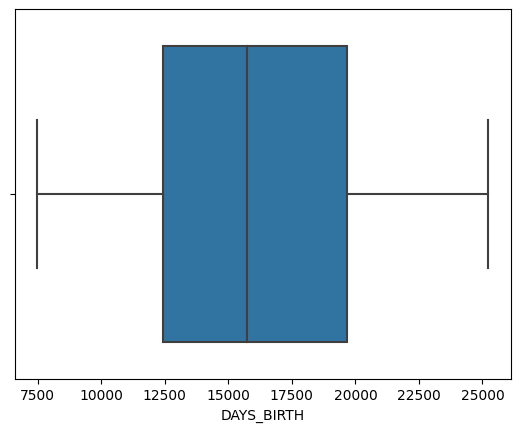

In [76]:
sns.boxplot(data=application_data_df,x='DAYS_BIRTH')

<AxesSubplot:xlabel='DAYS_EMPLOYED'>

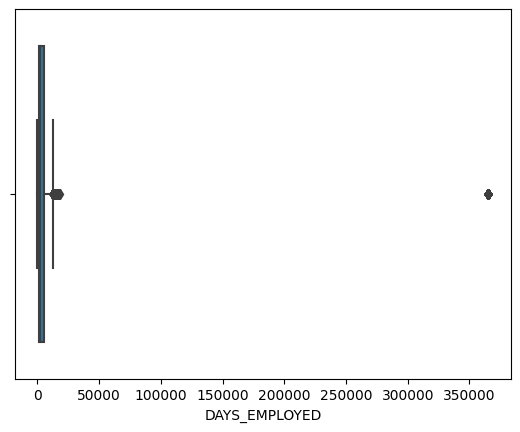

In [77]:
sns.boxplot(data=application_data_df,x='DAYS_EMPLOYED')

In [78]:
application_data_df['DAYS_EMPLOYED_YEARS'] = application_data_df['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

application_data_df['DAYS_EMPLOYED_RANGE']=pd.cut(application_data_df['DAYS_EMPLOYED_YEARS'],bins=bins,labels=slots)

In [79]:

application_data_df['DAYS_EMPLOYED_RANGE'].value_counts(normalize=True)*100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
60 above     0.000000
Name: DAYS_EMPLOYED_RANGE, dtype: float64

In [80]:
application_data_df['AGE'] = application_data_df['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

application_data_df['AGE_GROUP']=pd.cut(application_data_df['AGE'],bins=bins,labels=slots)

In [81]:
application_data_df['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='TARGET'>

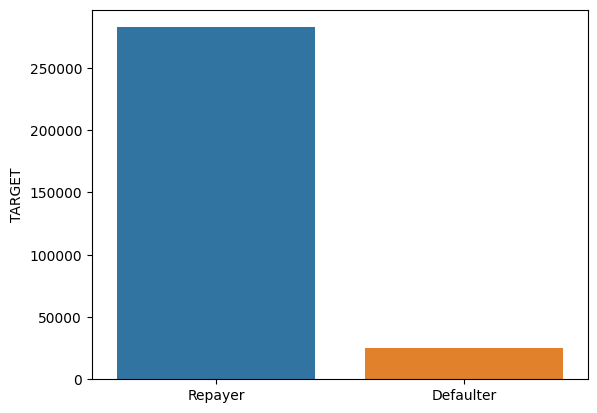

In [82]:
num_data = application_data_df["TARGET"].value_counts().reset_index()
x=['Repayer','Defaulter']
sns.barplot(x,'TARGET',data=num_data)

In [83]:
count_0 = num_data.iloc[0]["TARGET"]
count_1 = num_data.iloc[1]["TARGET"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)
count_0_perc

91.93

In [84]:
count_1_perc

8.07

In [85]:
application_data_df.dtypes.value_counts()

float64     18
int64       17
object      10
category     1
category     1
dtype: int64

In [86]:
obj_col = application_data_df.select_dtypes(include=['object']).columns
obj_col

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [87]:
application_data_df.groupby(['NAME_CONTRACT_TYPE']).size()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64

In [88]:
data_per = application_data_df[['NAME_CONTRACT_TYPE', 'TARGET']].groupby(['NAME_CONTRACT_TYPE'], as_index=False).mean()

data_per['PCT'] = data_per['TARGET']*100
data_per

,NAME_CONTRACT_TYPE,TARGET,PCT
0,Cash loans,0.083459,8.345913
1,Revolving loans,0.054783,5.478329


<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

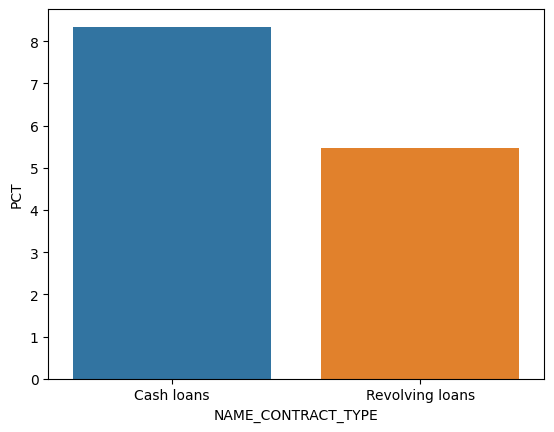

In [89]:
sns.barplot(data=data_per, x='NAME_CONTRACT_TYPE', y='PCT')

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

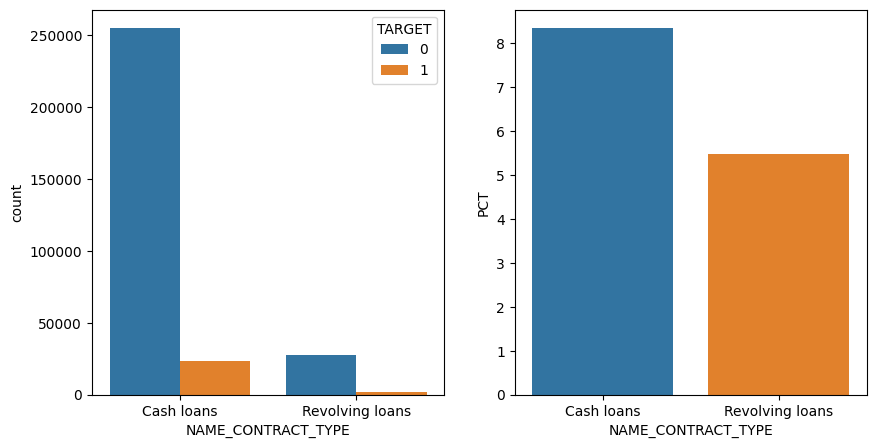

In [90]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=application_data_df,x='NAME_CONTRACT_TYPE',hue='TARGET')
              
plt.subplot(1,2,2)              
sns.barplot(data=data_per, x='NAME_CONTRACT_TYPE', y='PCT')

In [91]:
application_data_df.groupby(['CODE_GENDER']).size()

CODE_GENDER
F      202448
M      105059
XNA         4
dtype: int64

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

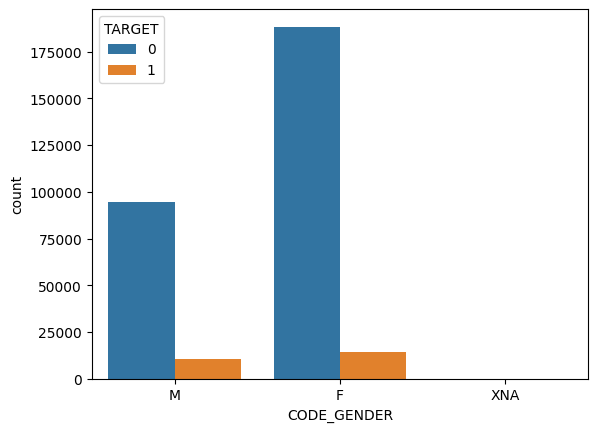

In [92]:
sns.countplot(data=application_data_df,x='CODE_GENDER',hue='TARGET')

In [93]:
data_per = application_data_df[['CODE_GENDER', 'TARGET']].groupby(['CODE_GENDER'], as_index=False).mean()

data_per['PCT'] = data_per['TARGET']*100
data_per

,CODE_GENDER,TARGET,PCT
0,F,0.069993,6.999328
1,M,0.101419,10.141920
2,XNA,0.000000,0.000000


<AxesSubplot:xlabel='CODE_GENDER', ylabel='PCT'>

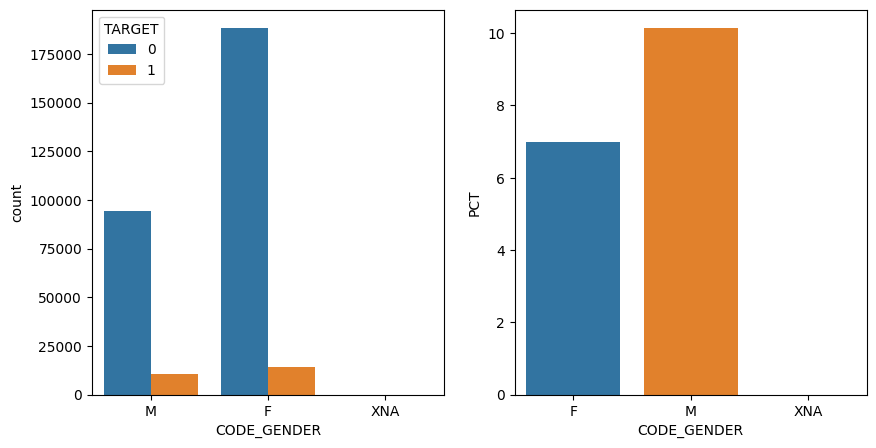

In [94]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=application_data_df,x='CODE_GENDER',hue='TARGET')
              
plt.subplot(1,2,2)              
sns.barplot(data=data_per, x='CODE_GENDER', y='PCT')

In [95]:
data_per = application_data_df[['NAME_TYPE_SUITE', 'TARGET']].groupby(['NAME_TYPE_SUITE'], as_index=False).mean()

data_per['PCT'] = data_per['TARGET']*100
data_per

,NAME_TYPE_SUITE,TARGET,PCT
0,Children,0.073768,7.376798
1,Family,0.074946,7.494583
2,Group of people,0.084871,8.487085
3,Other_A,0.087760,8.775982
4,Other_B,0.098305,9.830508
5,"Spouse, partner",0.078716,7.871592
6,Unaccompanied,0.081687,8.168747


<AxesSubplot:xlabel='NAME_TYPE_SUITE', ylabel='PCT'>

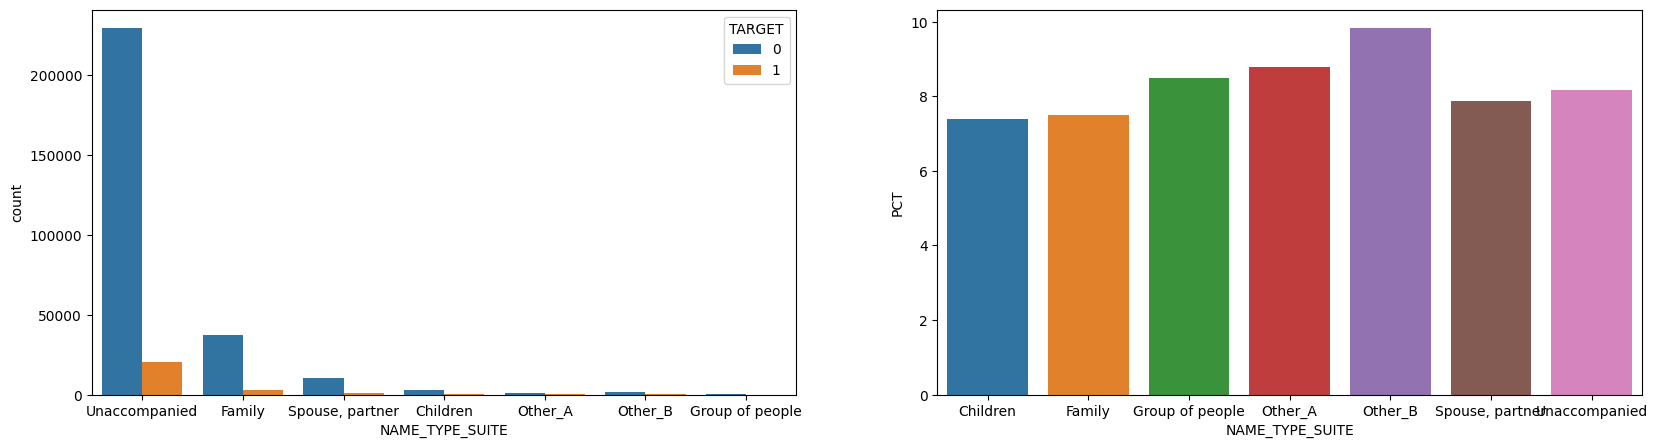

In [96]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(data=application_data_df,x='NAME_TYPE_SUITE',hue='TARGET')
              
plt.subplot(1,2,2)              
sns.barplot(data=data_per, x='NAME_TYPE_SUITE', y='PCT')

In [97]:
data_per = application_data_df[['NAME_INCOME_TYPE', 'TARGET']].groupby(['NAME_INCOME_TYPE'], as_index=False).mean()

data_per['PCT'] = data_per['TARGET']*100
data_per

,NAME_INCOME_TYPE,TARGET,PCT
0,Businessman,0.000000,0.000000
1,Commercial associate,0.074843,7.484257
2,Maternity leave,0.400000,40.000000
3,Pensioner,0.053864,5.386366
4,State servant,0.057550,5.754965
5,Student,0.000000,0.000000
6,Unemployed,0.363636,36.363636
7,Working,0.095885,9.588472


<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='PCT'>

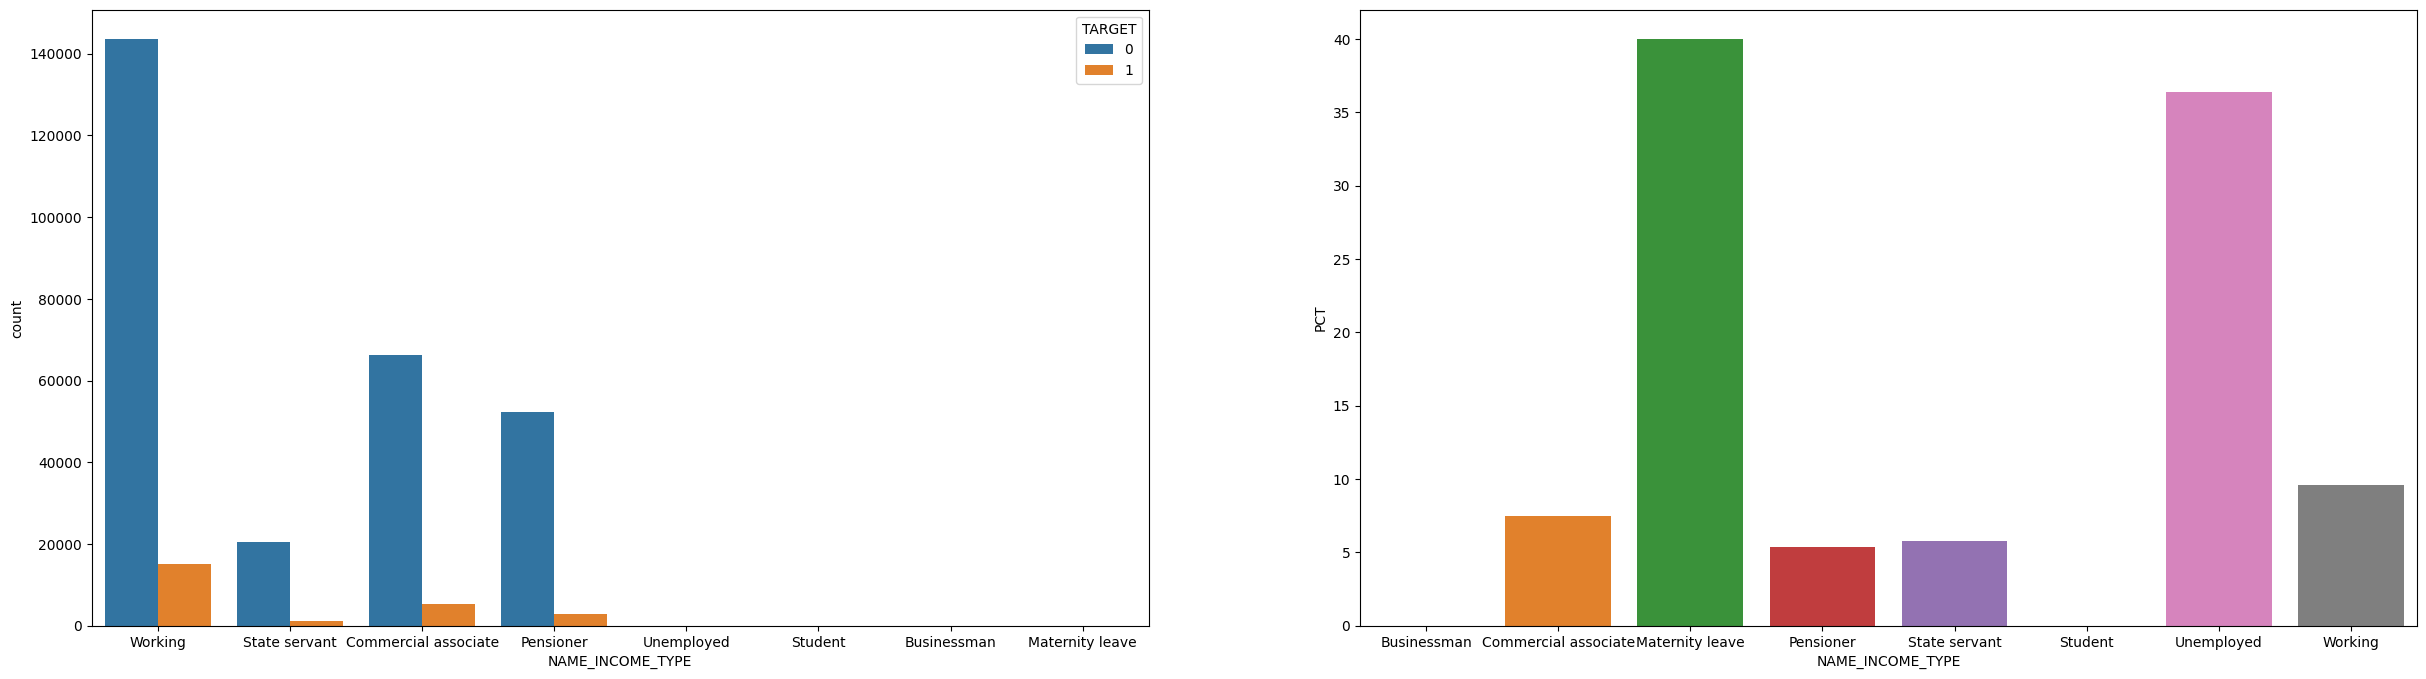

In [98]:
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
sns.countplot(data=application_data_df,x='NAME_INCOME_TYPE',hue='TARGET')
              
plt.subplot(1,2,2)              
sns.barplot(data=data_per, x='NAME_INCOME_TYPE', y='PCT')

In [99]:
data_per = application_data_df[['NAME_EDUCATION_TYPE', 'TARGET']].groupby(['NAME_EDUCATION_TYPE'], as_index=False).mean()

data_per['PCT'] = data_per['TARGET']*100
data_per

,NAME_EDUCATION_TYPE,TARGET,PCT
0,Academic degree,0.018293,1.829268
1,Higher education,0.053551,5.355115
2,Incomplete higher,0.084850,8.484966
3,Lower secondary,0.109277,10.927673
4,Secondary / secondary special,0.089399,8.939929


<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='PCT'>

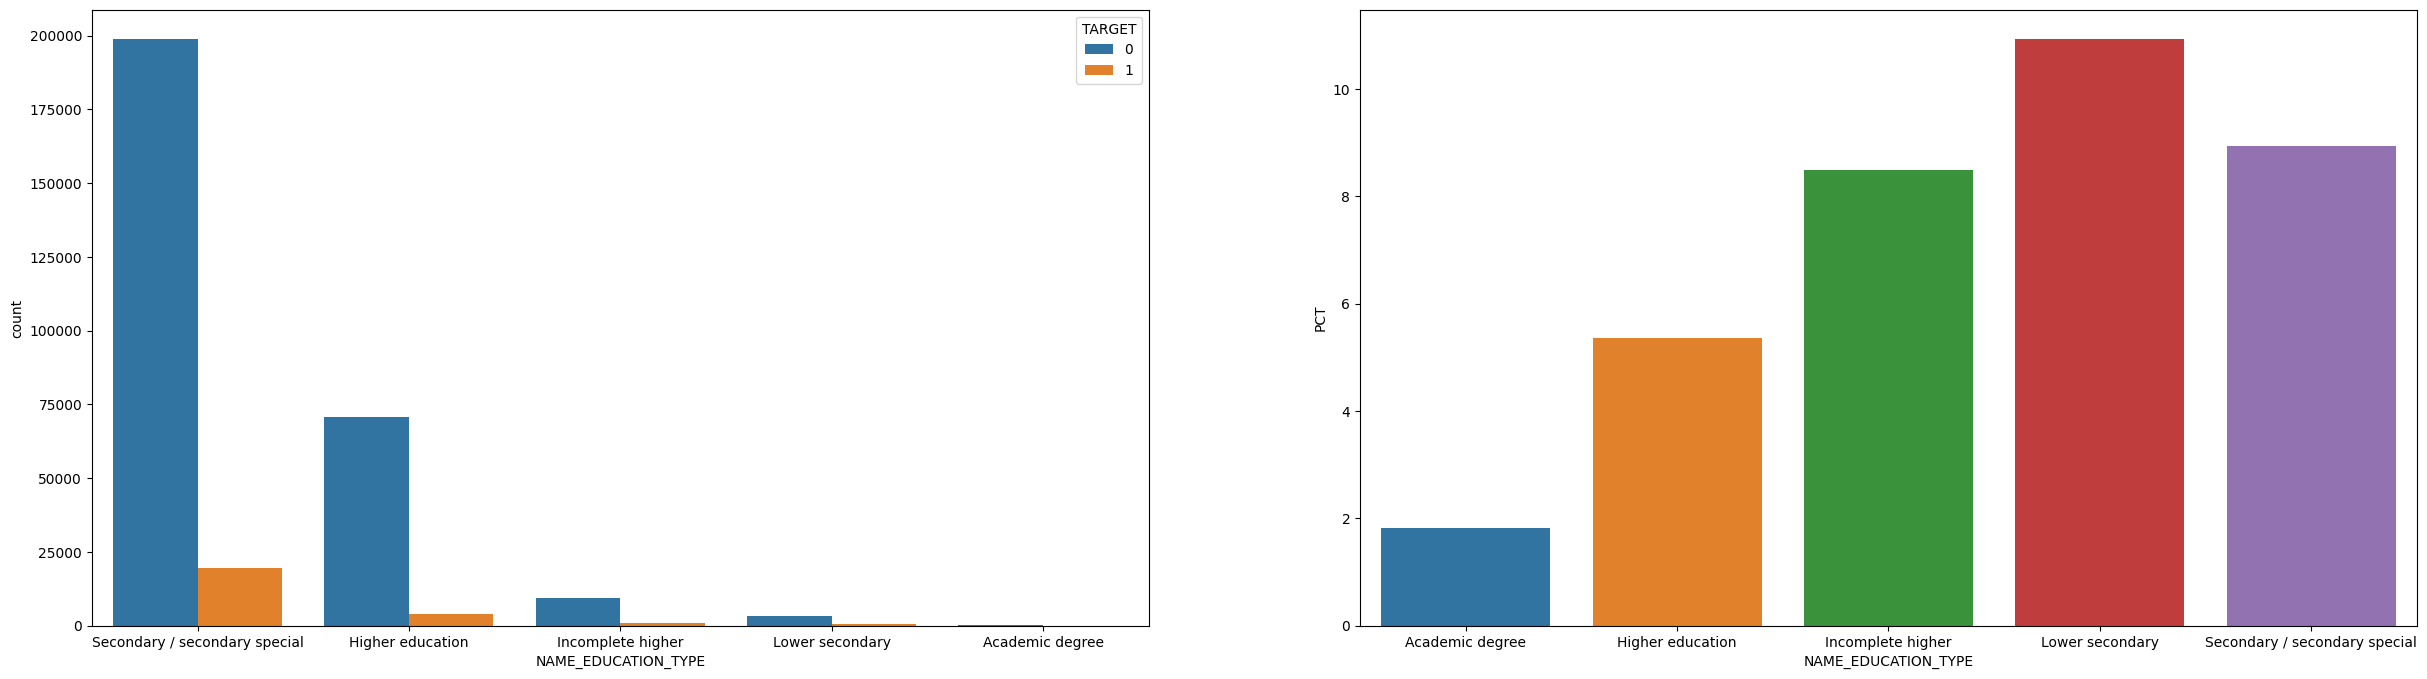

In [100]:
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
sns.countplot(data=application_data_df,x='NAME_EDUCATION_TYPE',hue='TARGET')
              
plt.subplot(1,2,2)              
sns.barplot(data=data_per, x='NAME_EDUCATION_TYPE', y='PCT')

In [101]:
data_per = application_data_df[['NAME_FAMILY_STATUS', 'TARGET']].groupby(['NAME_FAMILY_STATUS'], as_index=False).mean()

data_per['PCT'] = data_per['TARGET']*100
data_per

,NAME_FAMILY_STATUS,TARGET,PCT
0,Civil marriage,0.099446,9.944584
1,Married,0.075599,7.559868
2,Separated,0.081942,8.194234
3,Single / not married,0.098077,9.807675
4,Unknown,0.000000,0.000000
5,Widow,0.058242,5.824217


<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='PCT'>

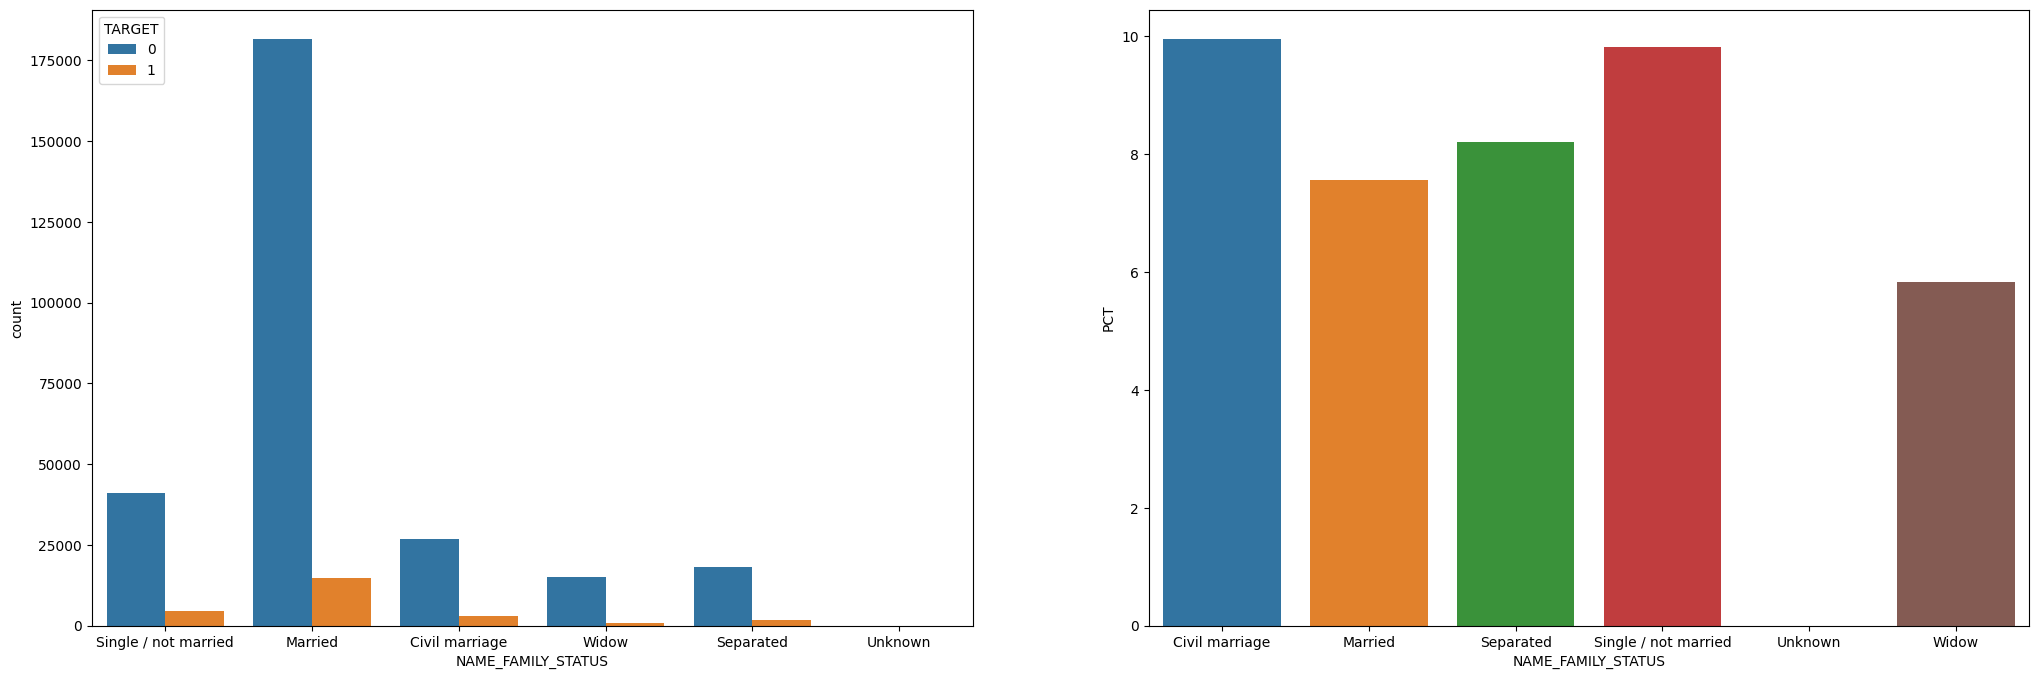

In [102]:
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
sns.countplot(data=application_data_df,x='NAME_FAMILY_STATUS',hue='TARGET')
              
plt.subplot(1,2,2)              
sns.barplot(data=data_per, x='NAME_FAMILY_STATUS', y='PCT')

In [103]:
data_per = application_data_df[['NAME_HOUSING_TYPE', 'TARGET']].groupby(['NAME_HOUSING_TYPE'], as_index=False).mean()

data_per['PCT'] = data_per['TARGET']*100
data_per

,NAME_HOUSING_TYPE,TARGET,PCT
0,Co-op apartment,0.079323,7.932264
1,House / apartment,0.077957,7.795711
2,Municipal apartment,0.085397,8.539748
3,Office apartment,0.065724,6.572411
4,Rented apartment,0.123131,12.313051
5,With parents,0.116981,11.698113


<AxesSubplot:xlabel='NAME_HOUSING_TYPE', ylabel='PCT'>

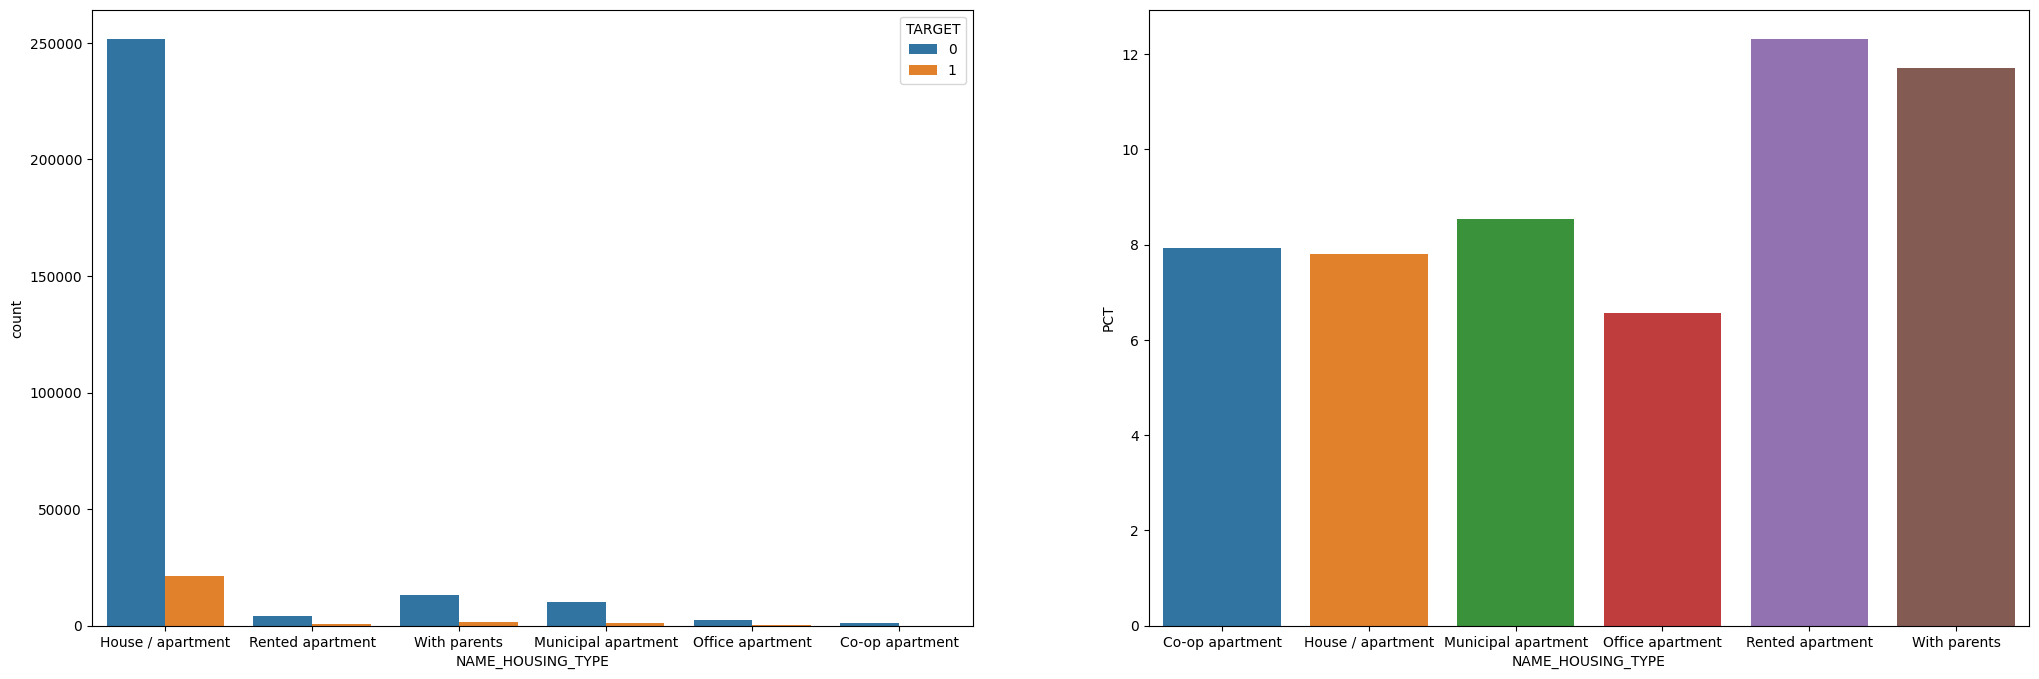

In [104]:
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
sns.countplot(data=application_data_df,x='NAME_HOUSING_TYPE',hue='TARGET')
              
plt.subplot(1,2,2)              
sns.barplot(data=data_per, x='NAME_HOUSING_TYPE', y='PCT')

In [105]:
data_per = application_data_df[['OCCUPATION_TYPE', 'TARGET']].groupby(['OCCUPATION_TYPE'], as_index=False).mean()

data_per['PCT'] = data_per['TARGET']*100
data_per

,OCCUPATION_TYPE,TARGET,PCT
0,Accountants,0.048303,4.830327
1,Cleaning staff,0.096067,9.606705
2,Cooking staff,0.104440,10.443996
3,Core staff,0.063040,6.303954
4,Drivers,0.113261,11.326130
5,HR staff,0.063943,6.394316
6,High skill tech staff,0.061599,6.159930
7,IT staff,0.064639,6.463878
8,Laborers,0.079933,7.993297
9,Low-skill Laborers,0.171524,17.152413


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Accountants'),
  Text(1, 0, 'Cleaning staff'),
  Text(2, 0, 'Cooking staff'),
  Text(3, 0, 'Core staff'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'HR staff'),
  Text(6, 0, 'High skill tech staff'),
  Text(7, 0, 'IT staff'),
  Text(8, 0, 'Laborers'),
  Text(9, 0, 'Low-skill Laborers'),
  Text(10, 0, 'Managers'),
  Text(11, 0, 'Medicine staff'),
  Text(12, 0, 'Private service staff'),
  Text(13, 0, 'Realty agents'),
  Text(14, 0, 'Sales staff'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'Security staff'),
  Text(17, 0, 'Waiters/barmen staff')])

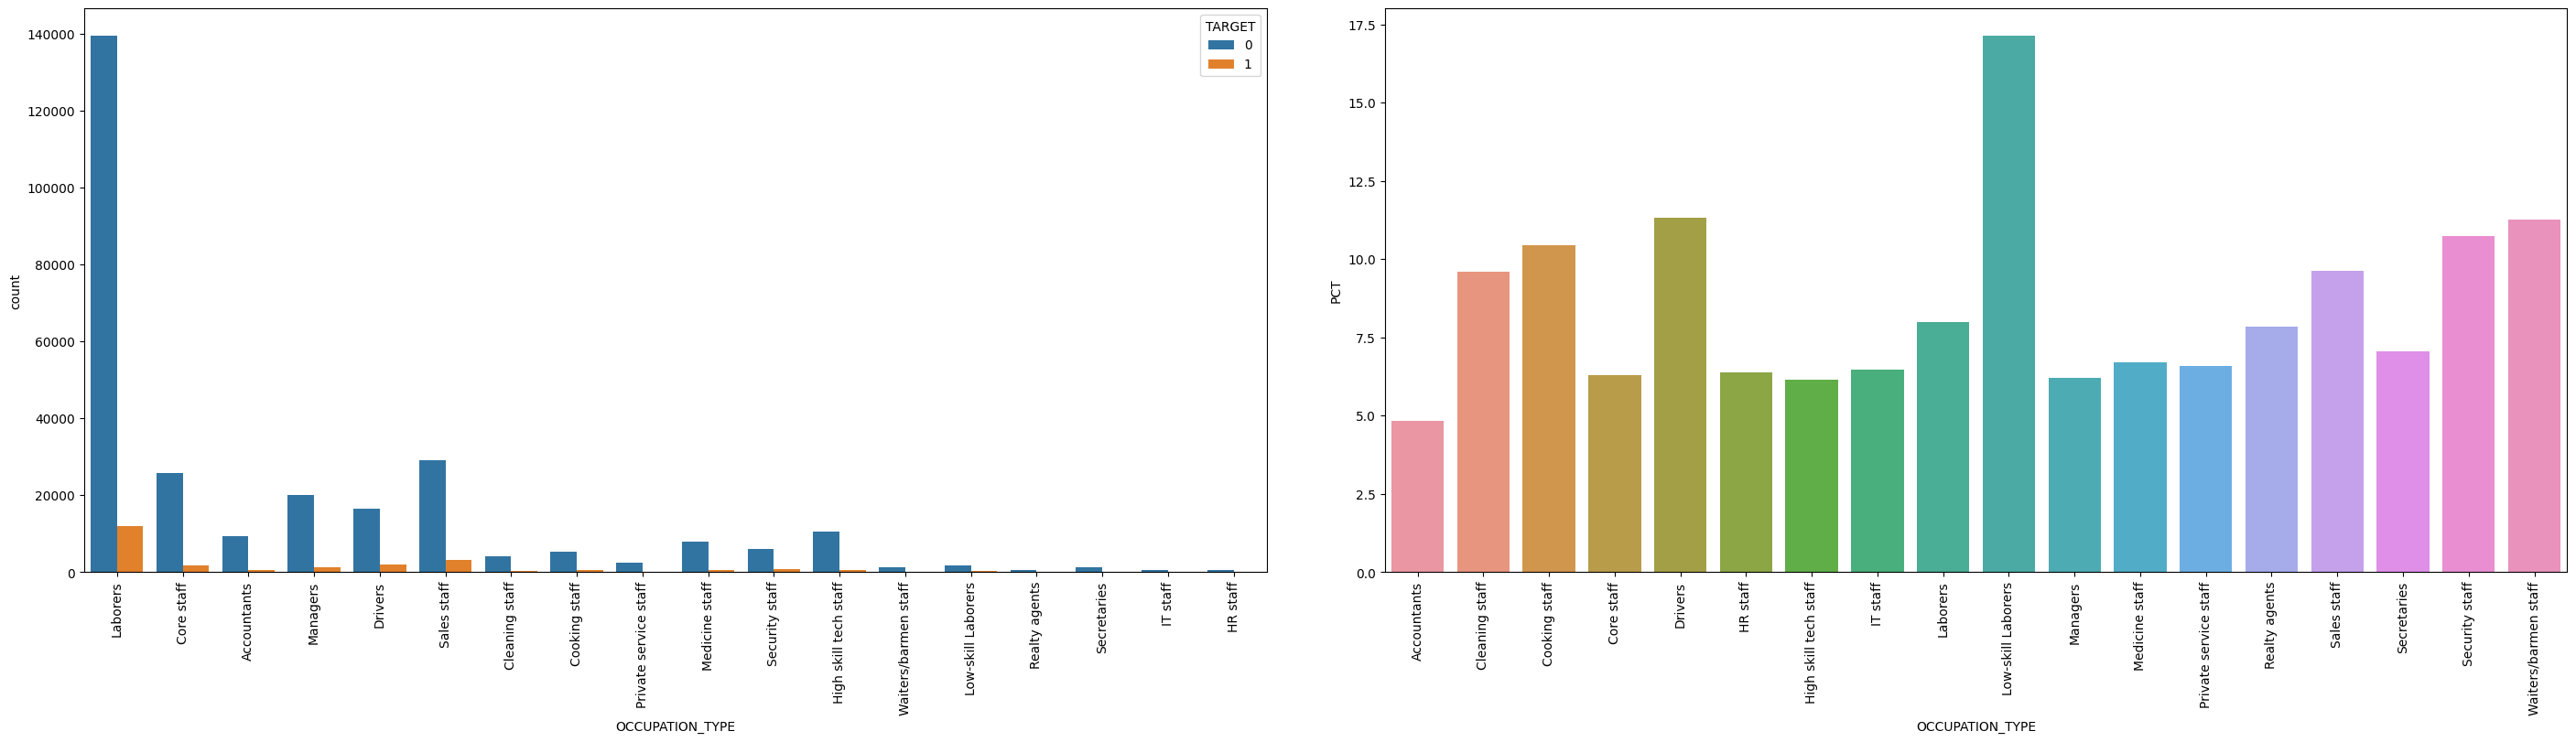

In [106]:
plt.figure(figsize=(35,8))

plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.1, hspace=1)
sns.countplot(data=application_data_df,x='OCCUPATION_TYPE',hue='TARGET')
plt.xticks(rotation=90)
              
plt.subplot(1,2,2)              
sns.barplot(data=data_per, x='OCCUPATION_TYPE', y='PCT')
plt.xticks(rotation=90)

In [107]:
data_per = application_data_df[['WEEKDAY_APPR_PROCESS_START', 'TARGET']].groupby(['WEEKDAY_APPR_PROCESS_START'], as_index=False).mean()

data_per['PCT'] = data_per['TARGET']*100
data_per

,WEEKDAY_APPR_PROCESS_START,TARGET,PCT
0,FRIDAY,0.081469,8.146927
1,MONDAY,0.077572,7.757227
2,SATURDAY,0.078873,7.887274
3,SUNDAY,0.079291,7.929053
4,THURSDAY,0.081003,8.100255
5,TUESDAY,0.083505,8.350494
6,WEDNESDAY,0.081604,8.160357


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'FRIDAY'),
  Text(1, 0, 'MONDAY'),
  Text(2, 0, 'SATURDAY'),
  Text(3, 0, 'SUNDAY'),
  Text(4, 0, 'THURSDAY'),
  Text(5, 0, 'TUESDAY'),
  Text(6, 0, 'WEDNESDAY')])

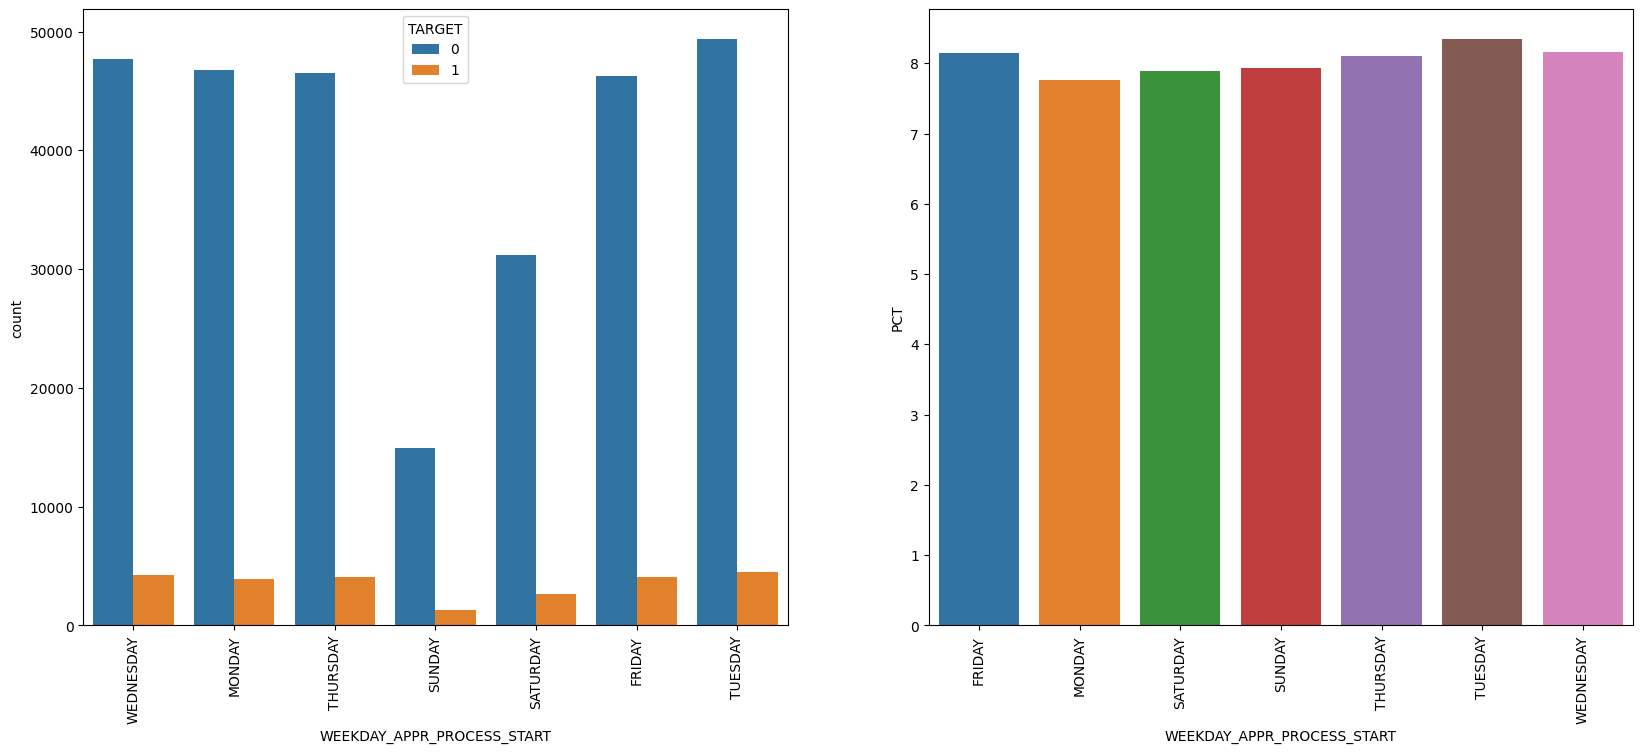

In [108]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(data=application_data_df,x='WEEKDAY_APPR_PROCESS_START',hue='TARGET')
plt.xticks(rotation=90)
              
plt.subplot(1,2,2)              
sns.barplot(data=data_per, x='WEEKDAY_APPR_PROCESS_START', y='PCT')
plt.xticks(rotation=90)

In [109]:
data_per = application_data_df[['ORGANIZATION_TYPE', 'TARGET']].groupby(['ORGANIZATION_TYPE'], as_index=False).mean()

data_per['PCT'] = data_per['TARGET']*100
data_per

,ORGANIZATION_TYPE,TARGET,PCT
0,Advertising,0.081585,8.158508
1,Agriculture,0.104727,10.472698
2,Bank,0.051855,5.185481
3,Business Entity Type 1,0.081384,8.138369
4,Business Entity Type 2,0.085284,8.528381
5,Business Entity Type 3,0.092996,9.299623
6,Cleaning,0.111538,11.153846
7,Construction,0.116798,11.679810
8,Culture,0.055409,5.540897
9,Electricity,0.066316,6.631579


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 [Text(0, 0, 'Advertising'),
  Text(1, 0, 'Agriculture'),
  Text(2, 0, 'Bank'),
  Text(3, 0, 'Business Entity Type 1'),
  Text(4, 0, 'Business Entity Type 2'),
  Text(5, 0, 'Business Entity Type 3'),
  Text(6, 0, 'Cleaning'),
  Text(7, 0, 'Construction'),
  Text(8, 0, 'Culture'),
  Text(9, 0, 'Electricity'),
  Text(10, 0, 'Emergency'),
  Text(11, 0, 'Government'),
  Text(12, 0, 'Hotel'),
  Text(13, 0, 'Housing'),
  Text(14, 0, 'Industry: type 1'),
  Text(15, 0, 'Industry: type 10'),
  Text(16, 0, 'Industry: type 11'),
  Text(17, 0, 'Industry: type 12'),
  Text(18, 0, 'Industry: type 13'),
  Text(19, 0, 'Industry: type 2'),
  Text(20, 0, 'Industry: type 3'),
  Text(21, 0, 'Industry: type 4'),
  Text(22, 0, 'Industry: type 5')

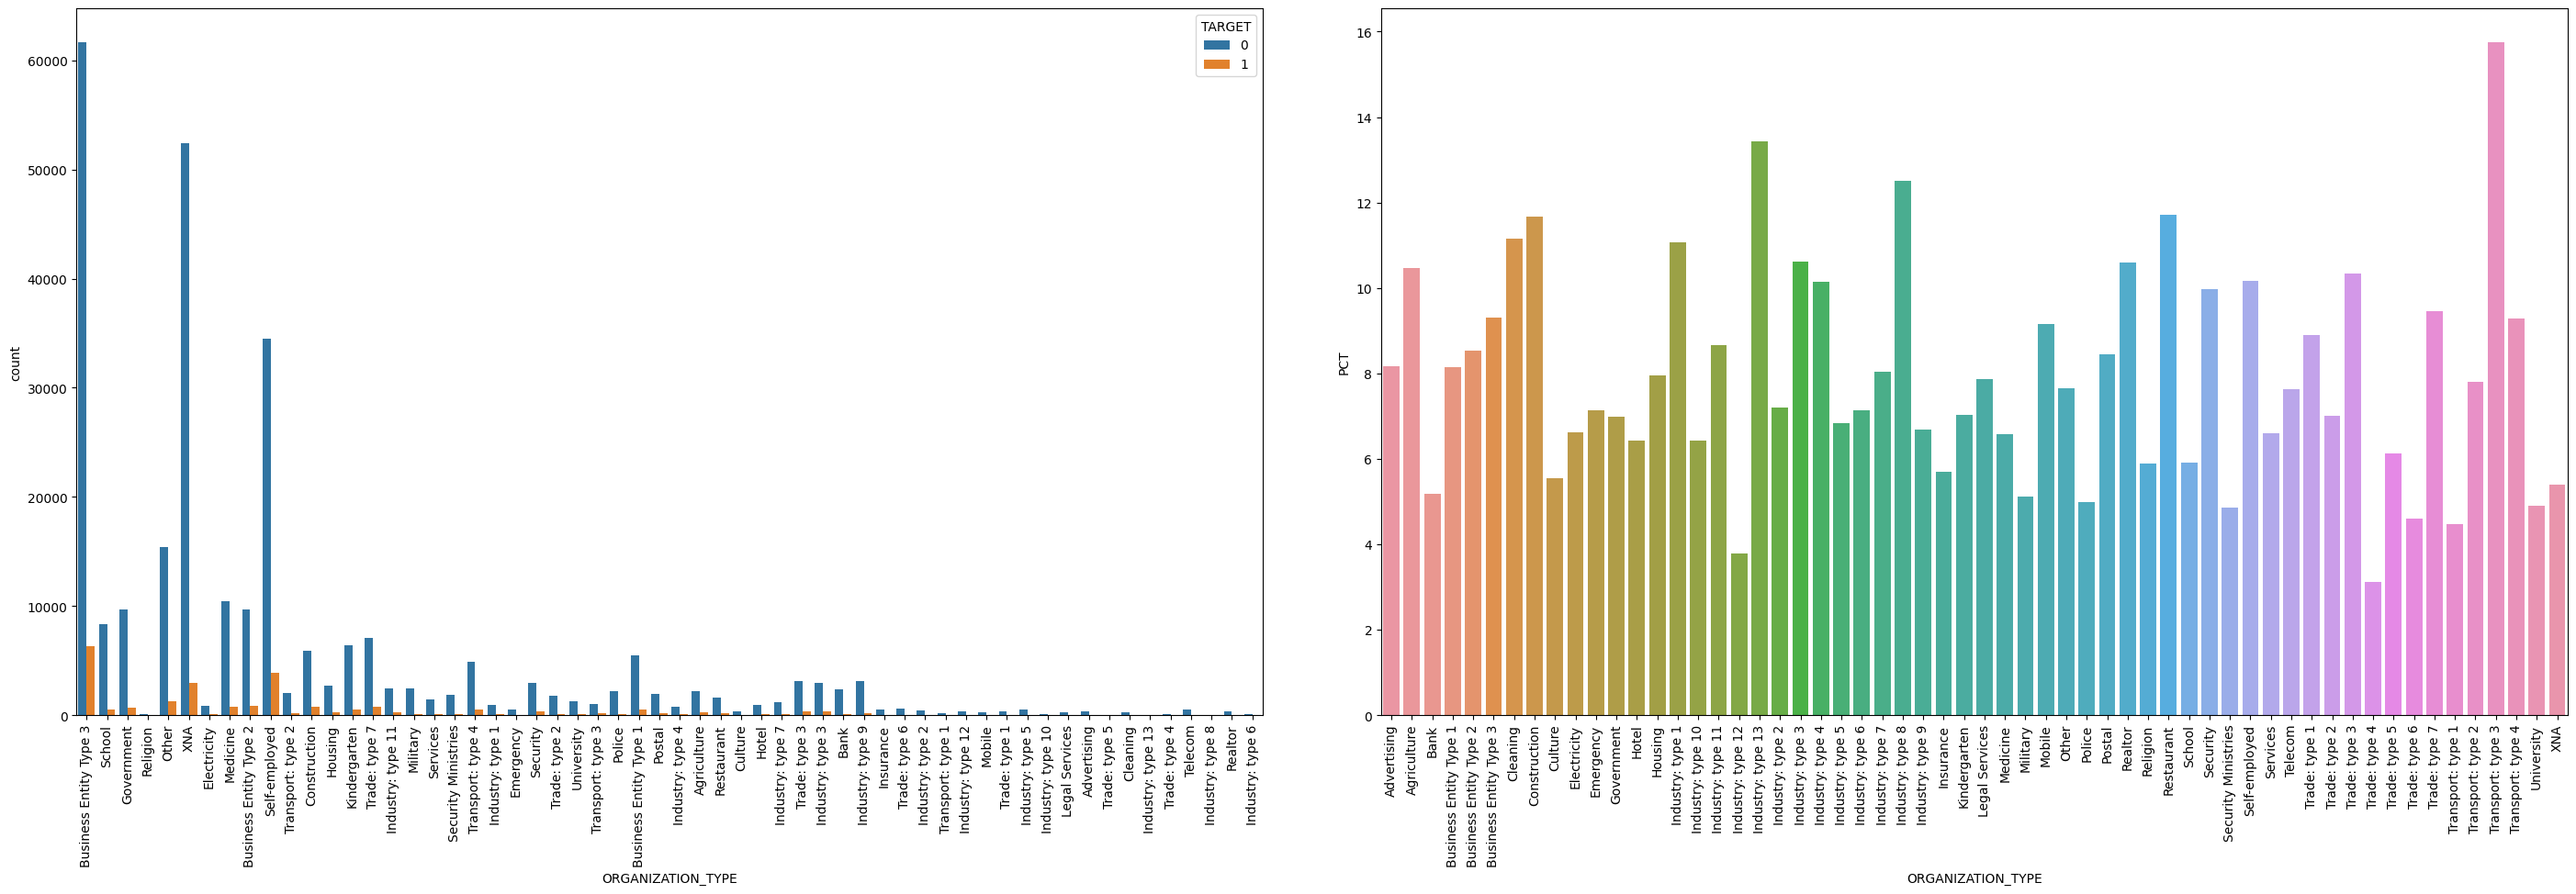

In [110]:
plt.figure(figsize=(35,10))

plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.1, hspace=1)
sns.countplot(data=application_data_df,x='ORGANIZATION_TYPE',hue='TARGET')
plt.xticks(rotation=90)
              
plt.subplot(1,2,2)              
sns.barplot(data=data_per, x='ORGANIZATION_TYPE', y='PCT')
plt.xticks(rotation=90)

In [111]:
application_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   CNT_CHILDREN                 307511 non-null  int64   
 5   AMT_INCOME_TOTAL             307511 non-null  float64 
 6   AMT_CREDIT                   307511 non-null  float64 
 7   AMT_ANNUITY                  307511 non-null  float64 
 8   AMT_GOODS_PRICE              307511 non-null  float64 
 9   NAME_TYPE_SUITE              307511 non-null  object  
 10  NAME_INCOME_TYPE             307511 non-null  object  
 11  NAME_EDUCATION_TYPE          307511 non-null  object  
 12  NAME_FAMILY_STATUS           307511 non-null

In [112]:
num_var = application_data_df.select_dtypes(include=['float64', 'int64']).columns
len(num_var)

35

In [113]:
num_data = application_data_df[num_var]
num_data.groupby(['TARGET']).size()

TARGET
0    282686
1     24825
dtype: int64

In [114]:
num_data.groupby(['TARGET']).size()/num_data.shape[0] * 100

TARGET
0    91.927118
1     8.072882
dtype: float64

In [115]:
defaulters = num_data[num_data['TARGET']==1].drop(['TARGET'], axis = 1)
defaulters

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_YEARS,AGE
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,...,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1,25
26,100031,0,112500.0,979992.0,27076.5,702000.0,0.018029,18724,2628,6573.0,...,0.0,161.0,0.0,0.0,0.0,0.0,2.0,2.0,7,51
40,100047,0,202500.0,1193580.0,35028.0,855000.0,0.025164,17482,1262,1182.0,...,0.0,1075.0,0.0,0.0,0.0,2.0,0.0,4.0,3,47
42,100049,0,135000.0,288873.0,16258.5,238500.0,0.007305,13384,3597,45.0,...,0.0,1480.0,0.0,0.0,0.0,0.0,0.0,2.0,9,36
81,100096,0,81000.0,252000.0,14593.5,252000.0,0.028663,24794,365243,5391.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,207000.0,450000.0,32746.5,450000.0,0.020246,9918,3048,8507.0,...,0.0,324.0,0.0,0.0,0.0,0.0,0.0,2.0,8,27
307475,456215,1,144000.0,1303200.0,46809.0,1125000.0,0.007330,13416,2405,500.0,...,0.0,1492.0,0.0,0.0,0.0,1.0,0.0,6.0,6,36
307481,456225,0,225000.0,297000.0,19975.5,297000.0,0.008575,20644,3147,8921.0,...,0.0,2941.0,0.0,0.0,0.0,0.0,0.0,3.0,8,56
307489,456233,0,225000.0,521280.0,23089.5,450000.0,0.014464,16471,286,8291.0,...,0.0,307.0,0.0,0.0,0.0,0.0,1.0,2.0,0,45


In [116]:
repayers = num_data[num_data['TARGET']==0].drop(['TARGET'],axis =1)
repayers

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_YEARS,AGE
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,...,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,3,45
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,...,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0,52
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,...,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,8,52
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,...,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,8,54
5,100008,0,99000.0,490495.5,27517.5,454500.0,0.035792,16941,1588,4970.0,...,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0,4,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,112500.0,225000.0,22050.0,225000.0,0.022800,24384,365243,7369.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1000,66
307506,456251,0,157500.0,254700.0,27558.0,225000.0,0.032561,9327,236,8456.0,...,0.0,273.0,0.0,0.0,0.0,0.0,0.0,1.0,0,25
307507,456252,0,72000.0,269550.0,12001.5,225000.0,0.025164,20775,365243,4388.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000,56
307508,456253,0,153000.0,677664.0,29979.0,585000.0,0.005002,14966,7921,6737.0,...,0.0,1909.0,1.0,0.0,0.0,1.0,0.0,1.0,21,41


In [117]:
defaulters_corr=defaulters.corr()
defaulters_corr

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_YEARS,AGE
SK_ID_CURR,1.000000,-0.005144,-0.010165,-0.001290,-0.007578,-0.001814,0.006301,0.001254,-0.005161,-0.006342,...,-0.009428,-0.002455,-0.011106,-0.007388,-0.003075,0.005180,-0.001614,0.006843,-0.005166,0.001160
CNT_CHILDREN,-0.005144,1.000000,0.004796,-0.001675,0.031257,-0.008111,-0.031975,-0.259109,-0.192864,-0.149154,...,-0.005106,-0.011547,0.000316,-0.011255,-0.009316,-0.008852,-0.013029,-0.027253,-0.192866,-0.259222
AMT_INCOME_TOTAL,-0.010165,0.004796,1.000000,0.038131,0.046421,0.037591,0.009135,-0.003096,-0.014977,-0.000158,...,-0.004866,0.002429,0.001079,0.000135,0.000941,0.005718,0.001037,0.004516,-0.014979,-0.003154
AMT_CREDIT,-0.001290,-0.001675,0.038131,1.000000,0.752195,0.982783,0.069161,0.135316,0.001930,0.025854,...,-0.030880,0.110851,-0.003771,0.004346,0.010598,0.056227,-0.007201,-0.020698,0.001936,0.135070
AMT_ANNUITY,-0.007578,0.031257,0.046421,0.752195,1.000000,0.752295,0.071690,0.014303,-0.081207,-0.034279,...,-0.027495,0.079870,0.012968,0.000074,0.028784,0.049000,-0.007261,-0.009819,-0.081213,0.014028
AMT_GOODS_PRICE,-0.001814,-0.008111,0.037591,0.982783,0.752295,1.000000,0.076053,0.135738,0.006648,0.025661,...,-0.026175,0.118232,-0.002451,0.005457,0.010793,0.059112,-0.006114,-0.022811,0.006650,0.135532
REGION_POPULATION_RELATIVE,0.006301,-0.031975,0.009135,0.069161,0.071690,0.076053,1.000000,0.048190,0.015532,0.056222,...,0.018231,0.055139,-0.000710,-0.004546,0.003485,0.065248,-0.004433,0.003198,0.015528,0.047956
DAYS_BIRTH,0.001254,-0.259109,-0.003096,0.135316,0.014303,0.135738,0.048190,1.000000,0.582185,0.289114,...,-0.004001,0.111199,-0.011650,0.007956,0.008244,0.010923,0.022904,0.083838,0.582187,0.999691
DAYS_EMPLOYED,-0.005161,-0.192864,-0.014977,0.001930,-0.081207,0.006648,0.015532,0.582185,1.000000,0.192455,...,0.005391,0.001402,-0.007307,0.019381,0.013237,-0.023088,0.012230,0.030812,1.000000,0.582441
DAYS_REGISTRATION,-0.006342,-0.149154,-0.000158,0.025854,-0.034279,0.025661,0.056222,0.289114,0.192455,1.000000,...,-0.009157,0.071727,0.004798,0.007868,-0.002278,-0.003401,0.012512,0.013572,0.192470,0.289116


In [118]:
defaulters_corr_unstack=defaulters_corr.where(np.triu(np.ones(defaulters_corr.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1',
                                                                                                                          'level_1':'var2',
                                                                                                                          0:'corr'})
defaulters_corr_unstack.head()

C:\Users\Harshita\AppData\Local\Temp\ipykernel_17876\11542395.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  defaulters_corr_unstack=defaulters_corr.where(np.triu(np.ones(defaulters_corr.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1',


,var1,var2,corr
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,CNT_CHILDREN,NaN
2,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
3,SK_ID_CURR,AMT_CREDIT,NaN
4,SK_ID_CURR,AMT_ANNUITY,NaN


In [119]:
defaulters_corr_unstack['corr'] = abs(defaulters_corr_unstack['corr'])
defaulters_corr_unstack.dropna(subset=['corr']).sort_values(by = ['corr'], ascending = False).head(10)

,var1,var2,corr
1096,DAYS_EMPLOYED_YEARS,DAYS_EMPLOYED,1.000000
1129,AGE,DAYS_BIRTH,0.999691
803,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269
173,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
454,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
375,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
838,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994
594,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
699,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
174,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295


In [120]:
repayers_corr = repayers.corr()
repayers_corr

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_YEARS,AGE
SK_ID_CURR,1.000000,-0.000716,0.001739,-0.000342,0.000068,-0.000235,0.000360,0.001346,0.001744,0.001475,...,0.002382,0.000998,-0.001774,-0.001626,0.002298,-0.000037,0.000963,0.003852,0.001742,0.001318
CNT_CHILDREN,-0.000716,1.000000,0.027397,0.003081,0.020905,-0.000559,-0.024363,-0.336966,-0.245174,-0.185792,...,-0.002172,0.008501,0.000147,0.001057,-0.000315,-0.007640,-0.004218,-0.035861,-0.245173,-0.336907
AMT_INCOME_TOTAL,0.001739,0.027397,1.000000,0.342799,0.418949,0.349426,0.167851,-0.062609,-0.140392,-0.064937,...,-0.027593,0.041338,0.002707,0.008029,0.008647,0.058682,0.017676,0.034384,-0.140394,-0.062494
AMT_CREDIT,-0.000342,0.003081,0.342799,1.000000,0.771297,0.987022,0.100604,0.047378,-0.070104,-0.013477,...,-0.022225,0.069540,-0.002267,0.005135,0.000941,0.055063,0.021825,-0.037519,-0.070105,0.047366
AMT_ANNUITY,0.000068,0.020905,0.418949,0.771297,1.000000,0.776421,0.120983,-0.012262,-0.104978,-0.039434,...,-0.023385,0.062012,0.003220,0.002464,0.012384,0.036293,0.011660,-0.008009,-0.104983,-0.012253
AMT_GOODS_PRICE,-0.000235,-0.000559,0.349426,0.987022,0.776421,1.000000,0.103826,0.044650,-0.068527,-0.015891,...,-0.023159,0.071361,-0.001698,0.005520,0.001192,0.056675,0.022134,-0.039762,-0.068527,0.044637
REGION_POPULATION_RELATIVE,0.000360,-0.024363,0.167851,0.100604,0.120983,0.103826,1.000000,0.025244,-0.007198,0.052083,...,0.002255,0.041164,-0.002334,0.001629,-0.002814,0.071495,-0.001954,0.000152,-0.007193,0.025332
DAYS_BIRTH,0.001346,-0.336966,-0.062609,0.047378,-0.012262,0.044650,0.025244,1.000000,0.626114,0.333151,...,0.000990,0.076510,-0.002926,-0.001587,0.003570,0.001871,0.015427,0.073352,0.626114,0.999711
DAYS_EMPLOYED,0.001744,-0.245174,-0.140392,-0.070104,-0.104978,-0.068527,-0.007198,0.626114,1.000000,0.214511,...,0.016383,-0.023379,-0.004292,-0.000932,0.001741,-0.032821,0.013322,0.046890,1.000000,0.626028
DAYS_REGISTRATION,0.001475,-0.185792,-0.064937,-0.013477,-0.039434,-0.015891,0.052083,0.333151,0.214511,1.000000,...,-0.002652,0.053533,0.002514,0.000009,0.001268,0.010877,0.000363,0.024278,0.214514,0.333025


In [121]:
repayers_corr_unstack=repayers_corr.where(np.triu(np.ones(repayers_corr.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1',
                                                                                                                          'level_1':'var2',
                                                                                                                          0:'corr'})
repayers_corr_unstack.head()

C:\Users\Harshita\AppData\Local\Temp\ipykernel_17876\40489262.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  repayers_corr_unstack=repayers_corr.where(np.triu(np.ones(repayers_corr.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1',


,var1,var2,corr
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,CNT_CHILDREN,NaN
2,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
3,SK_ID_CURR,AMT_CREDIT,NaN
4,SK_ID_CURR,AMT_ANNUITY,NaN


In [122]:
repayers_corr_unstack['corr'] = abs(repayers_corr_unstack['corr'])
repayers_corr_unstack.dropna(subset=['corr']).sort_values(by = ['corr'], ascending = False).head(10)

,var1,var2,corr
1096,DAYS_EMPLOYED_YEARS,DAYS_EMPLOYED,1.000000
1129,AGE,DAYS_BIRTH,0.999711
803,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
173,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
454,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
375,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
594,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
838,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859332
699,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381
174,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421


In [123]:
num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_YEARS,AGE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1,25
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,3,45
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0,52
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,8,52
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,8,54


In [124]:
amt_var = ['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

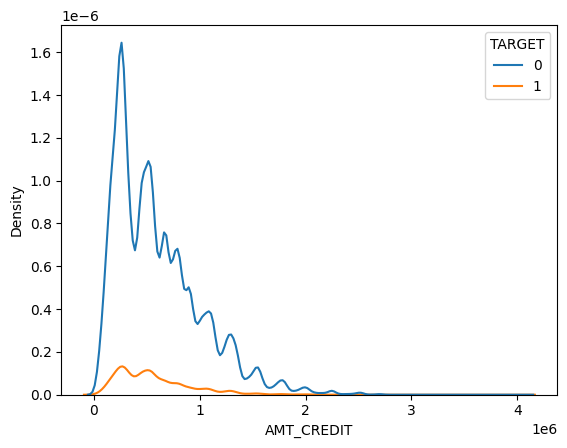

In [125]:
sns.kdeplot(data=num_data,x='AMT_CREDIT',hue='TARGET')

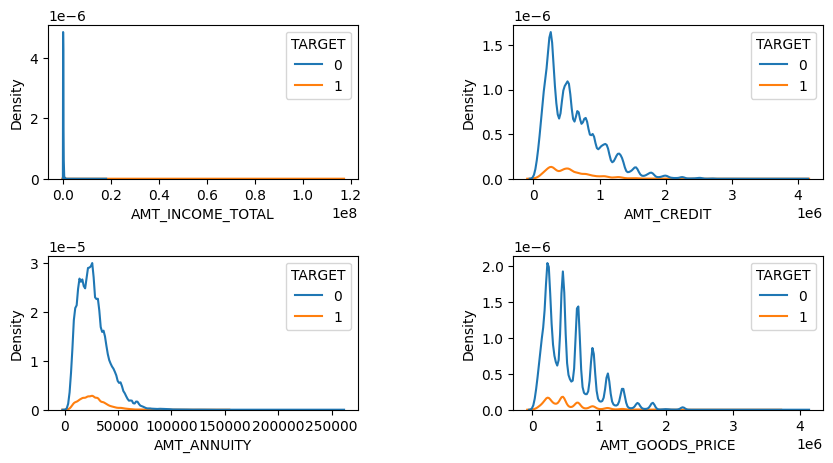

In [126]:
plt.figure(figsize=(10,5))
for i,col in enumerate(amt_var):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=num_data, x= col, hue='TARGET')
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='AMT_GOODS_PRICE'>

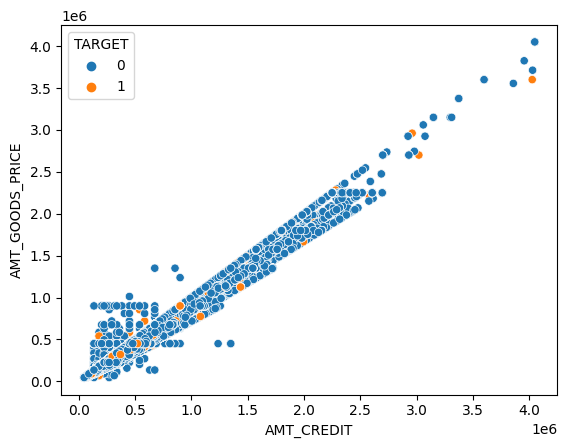

In [127]:
sns.scatterplot(data=num_data,x='AMT_CREDIT',y='AMT_GOODS_PRICE',hue='TARGET')

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='AMT_INCOME_TOTAL'>

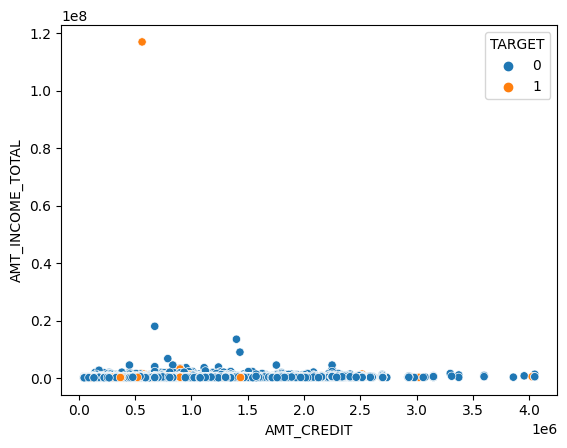

In [128]:
sns.scatterplot(data=num_data,x='AMT_CREDIT',y='AMT_INCOME_TOTAL',hue='TARGET')

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='CNT_CHILDREN'>

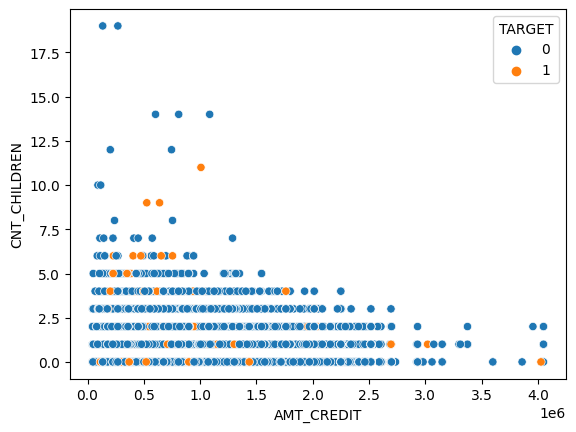

In [129]:
sns.scatterplot(data=num_data,x='AMT_CREDIT',y='CNT_CHILDREN',hue='TARGET')

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='AMT_ANNUITY'>

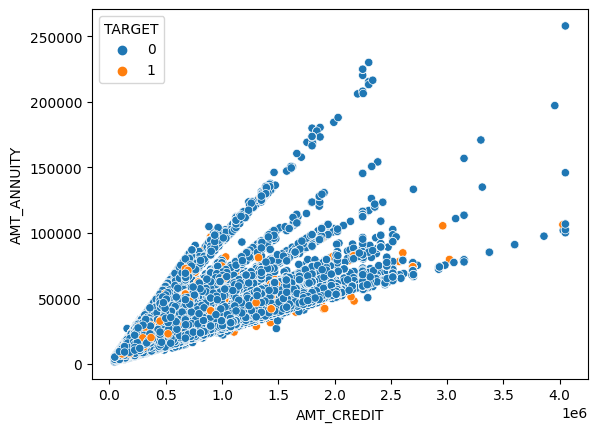

In [130]:
sns.scatterplot(data=num_data,x='AMT_CREDIT',y='AMT_ANNUITY',hue='TARGET')

Text(0, 0.5, 'Defaulters')

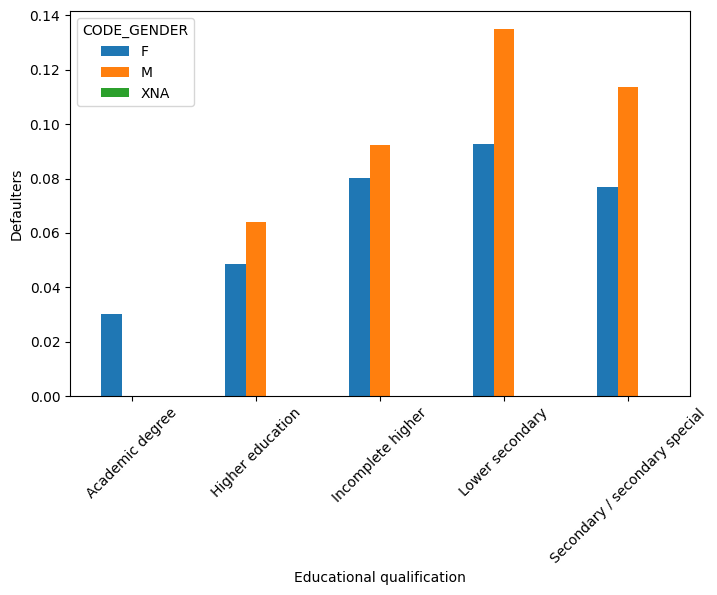

In [131]:
application_data_df.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Educational qualification')
plt.ylabel('Defaulters')

Text(0, 0.5, 'Defaulters')

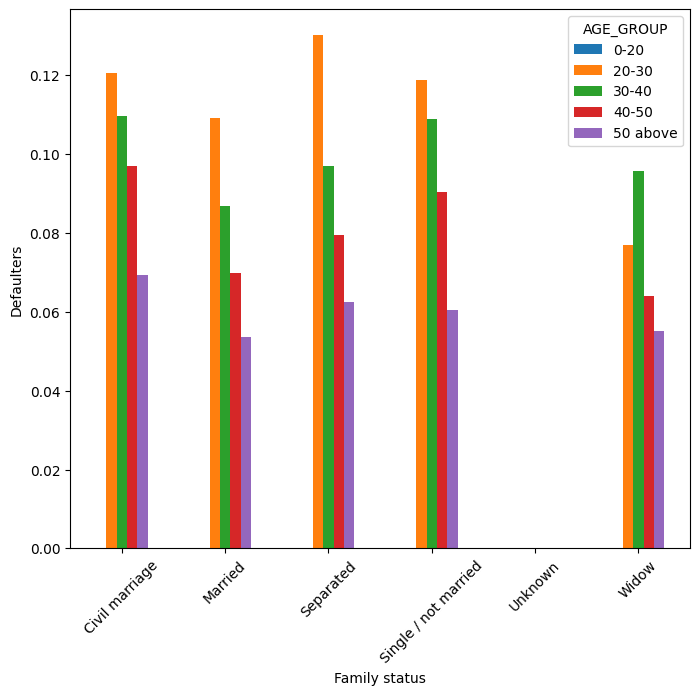

In [132]:
application_data_df.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

Text(0, 0.5, 'Defaulters')

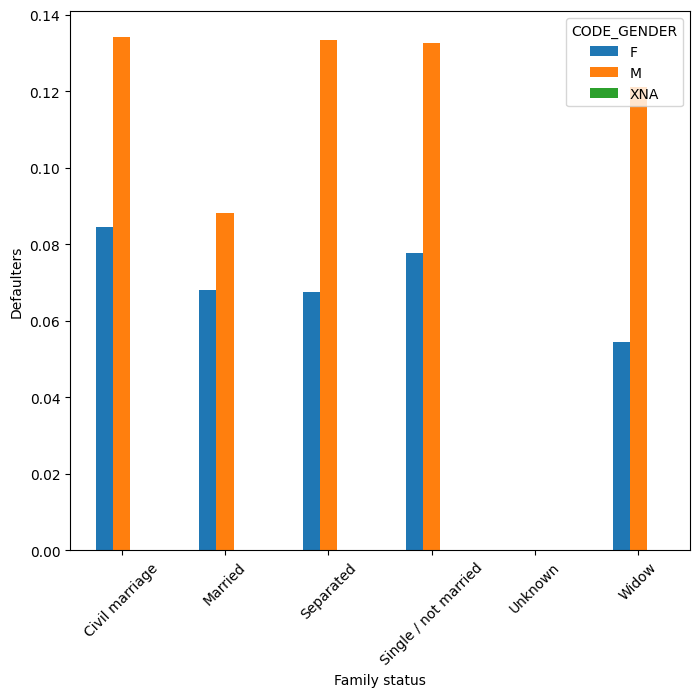

In [133]:

application_data_df.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

Text(0, 0.5, 'Defaulters')

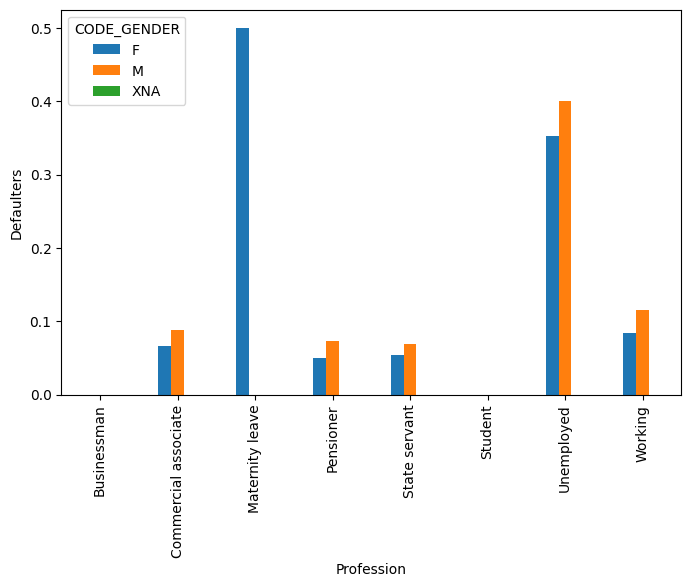

In [134]:
application_data_df.pivot_table(values='TARGET',index='NAME_INCOME_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=90)
plt.xlabel('Profession')
plt.ylabel('Defaulters')

Text(0, 0.5, 'Defaulters')

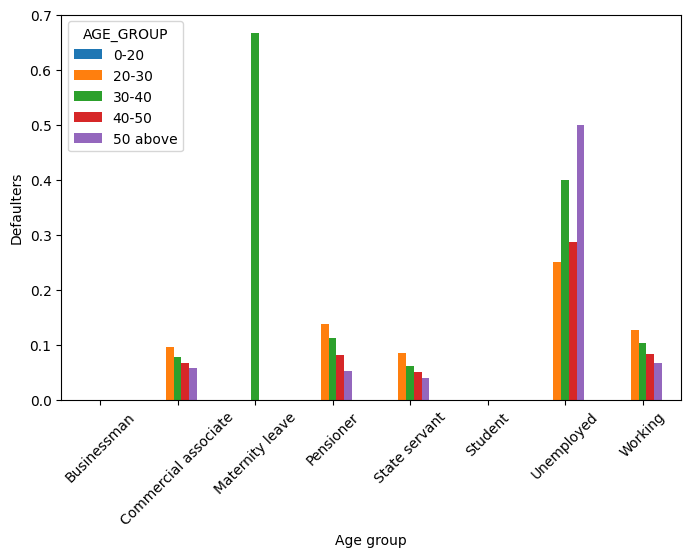

In [135]:
application_data_df.pivot_table(values='TARGET',index='NAME_INCOME_TYPE',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Age group')
plt.ylabel('Defaulters')

In [136]:
prev_app_data_df.shape

(1670214, 22)

In [137]:
(prev_app_data_df.isnull().sum().sort_values(ascending = False)/len(prev_app_data_df)) * 100

AMT_GOODS_PRICE           23.081773
AMT_ANNUITY               22.286665
CNT_PAYMENT               22.286366
PRODUCT_COMBINATION        0.020716
AMT_CREDIT                 0.000060
NAME_GOODS_CATEGORY        0.000000
NAME_YIELD_GROUP           0.000000
NAME_SELLER_INDUSTRY       0.000000
SELLERPLACE_AREA           0.000000
CHANNEL_TYPE               0.000000
NAME_PRODUCT_TYPE          0.000000
NAME_PORTFOLIO             0.000000
SK_ID_PREV                 0.000000
NAME_CLIENT_TYPE           0.000000
SK_ID_CURR                 0.000000
NAME_PAYMENT_TYPE          0.000000
DAYS_DECISION              0.000000
NAME_CONTRACT_STATUS       0.000000
NAME_CASH_LOAN_PURPOSE     0.000000
AMT_APPLICATION            0.000000
NAME_CONTRACT_TYPE         0.000000
CODE_REJECT_REASON         0.000000
dtype: float64

In [138]:
prev_app_data_df['AMT_GOODS_PRICE'].agg(func=['mean','median'])

mean      227847.279283
median    112320.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [139]:
 prev_app_data_df['AMT_GOODS_PRICE_MEDIAN'] = prev_app_data_df['AMT_GOODS_PRICE'].fillna((prev_app_data_df['AMT_GOODS_PRICE'].median()))

In [140]:
 prev_app_data_df['AMT_GOODS_PRICE_MEAN'] = prev_app_data_df['AMT_GOODS_PRICE'].fillna((prev_app_data_df['AMT_GOODS_PRICE'].mean()))

In [141]:
 prev_app_data_df['AMT_GOODS_PRICE_MODE'] = prev_app_data_df['AMT_GOODS_PRICE'].fillna(prev_app_data_df['AMT_GOODS_PRICE'].mode()[0])

In [142]:
amt_cols = ['AMT_GOODS_PRICE','AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE']

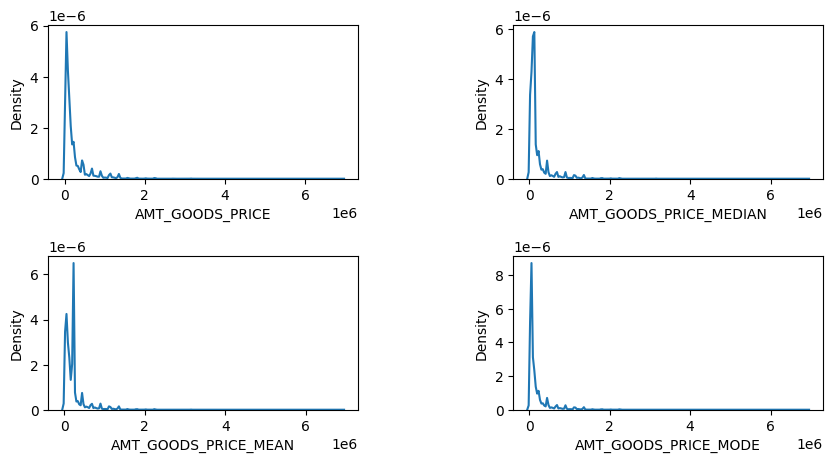

In [143]:
plt.figure(figsize=(10,5))

for i,col in enumerate(amt_cols):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=prev_app_data_df,x=col)
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [144]:
 prev_app_data_df['AMT_GOODS_PRICE'] = prev_app_data_df['AMT_GOODS_PRICE'].fillna((prev_app_data_df['AMT_GOODS_PRICE'].median()))

In [145]:
prev_app_data_df['AMT_GOODS_PRICE'].isnull().sum()

0

In [146]:
prev_app_data_df['AMT_ANNUITY'].agg(func=['mean','median','max'])

mean       15955.120659
median     11250.000000
max       418058.145000
Name: AMT_ANNUITY, dtype: float64

In [147]:
 prev_app_data_df['AMT_ANNUITY'] = prev_app_data_df['AMT_ANNUITY'].fillna((prev_app_data_df['AMT_ANNUITY'].median()))

In [148]:
prev_app_data_df['AMT_ANNUITY'].isnull().sum()

0

In [149]:
 prev_app_data_df['PRODUCT_COMBINATION'].head()

0    POS mobile with interest
1            Cash X-Sell: low
2           Cash X-Sell: high
3         Cash X-Sell: middle
4           Cash Street: high
Name: PRODUCT_COMBINATION, dtype: object

In [150]:
 prev_app_data_df['PRODUCT_COMBINATION'] = prev_app_data_df['PRODUCT_COMBINATION'].fillna(prev_app_data_df['PRODUCT_COMBINATION'].mode()[0])

In [151]:
 prev_app_data_df['CNT_PAYMENT'].agg(func=['mean','median','max'])

mean      16.054082
median    12.000000
max       84.000000
Name: CNT_PAYMENT, dtype: float64

In [152]:
prev_app_data_df[prev_app_data_df['CNT_PAYMENT'].isnull()].groupby(['NAME_CONTRACT_STATUS']).size().sort_values(ascending=False)

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
dtype: int64

In [153]:
prev_app_data_df['CNT_PAYMENT'] = prev_app_data_df['CNT_PAYMENT'].fillna(0)

In [154]:
prev_app_data_df.isnull().sum().sort_values(ascending=False)

AMT_CREDIT                1
SK_ID_PREV                0
NAME_GOODS_CATEGORY       0
AMT_GOODS_PRICE_MEAN      0
AMT_GOODS_PRICE_MEDIAN    0
PRODUCT_COMBINATION       0
NAME_YIELD_GROUP          0
CNT_PAYMENT               0
NAME_SELLER_INDUSTRY      0
SELLERPLACE_AREA          0
CHANNEL_TYPE              0
NAME_PRODUCT_TYPE         0
NAME_PORTFOLIO            0
NAME_CLIENT_TYPE          0
SK_ID_CURR                0
CODE_REJECT_REASON        0
NAME_PAYMENT_TYPE         0
DAYS_DECISION             0
NAME_CONTRACT_STATUS      0
NAME_CASH_LOAN_PURPOSE    0
AMT_GOODS_PRICE           0
AMT_APPLICATION           0
AMT_ANNUITY               0
NAME_CONTRACT_TYPE        0
AMT_GOODS_PRICE_MODE      0
dtype: int64

In [155]:
prev_app_data_df = prev_app_data_df.drop(labels=['AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MODE'],axis=1)

In [156]:
prev_app_data_df.isnull().sum().sort_values(ascending=False)

AMT_CREDIT                1
SK_ID_PREV                0
NAME_CLIENT_TYPE          0
NAME_YIELD_GROUP          0
CNT_PAYMENT               0
NAME_SELLER_INDUSTRY      0
SELLERPLACE_AREA          0
CHANNEL_TYPE              0
NAME_PRODUCT_TYPE         0
NAME_PORTFOLIO            0
NAME_GOODS_CATEGORY       0
CODE_REJECT_REASON        0
SK_ID_CURR                0
NAME_PAYMENT_TYPE         0
DAYS_DECISION             0
NAME_CONTRACT_STATUS      0
NAME_CASH_LOAN_PURPOSE    0
AMT_GOODS_PRICE           0
AMT_APPLICATION           0
AMT_ANNUITY               0
NAME_CONTRACT_TYPE        0
PRODUCT_COMBINATION       0
dtype: int64

In [157]:
len(prev_app_data_df.columns)

22

In [158]:
merged_data_df = pd.merge(application_data_df,prev_app_data_df,how='inner',on='SK_ID_CURR')
merged_data_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


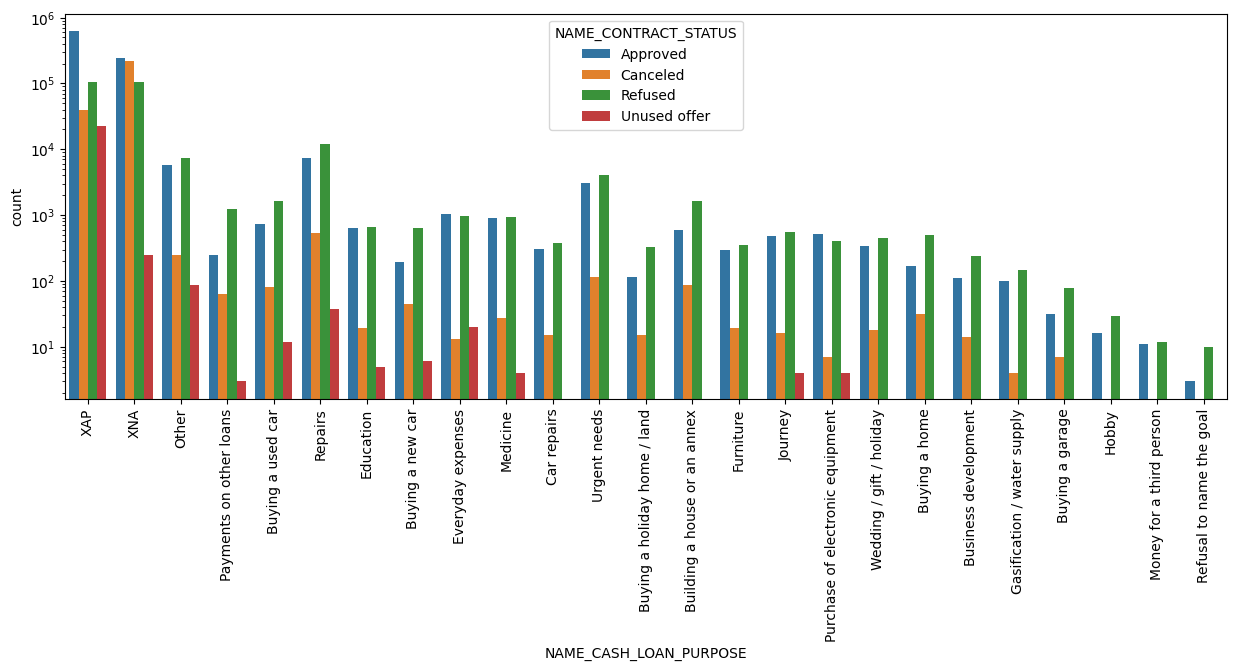

In [159]:
plt.figure(figsize=(15,5))

sns.countplot(data=merged_data_df,x='NAME_CASH_LOAN_PURPOSE', hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.yscale('log')

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

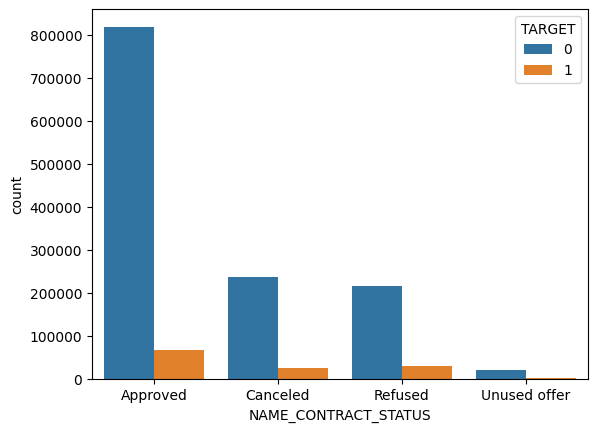

In [160]:
sns.countplot(data=merged_data_df,x='NAME_CONTRACT_STATUS',hue='TARGET')

In [161]:
agg_data = merged_data_df.groupby(['NAME_CONTRACT_STATUS','TARGET']).size().reset_index().rename(columns={0:'counts'})
sum_df = agg_data.groupby(['NAME_CONTRACT_STATUS'])['counts'].sum().reset_index()

agg_data_merged = pd.merge(agg_data,sum_df,how='left',on='NAME_CONTRACT_STATUS')
agg_data_merged['pct'] = round(agg_data_merged['counts_x']/agg_data_merged['counts_y']*100,2)
agg_data_merged

,NAME_CONTRACT_STATUS,TARGET,counts_x,counts_y,pct
0,Approved,0,818856,886099,92.41
1,Approved,1,67243,886099,7.59
2,Canceled,0,235641,259441,90.83
3,Canceled,1,23800,259441,9.17
4,Refused,0,215952,245390,88.00
5,Refused,1,29438,245390,12.00
6,Unused offer,0,20892,22771,91.75
7,Unused offer,1,1879,22771,8.25


<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

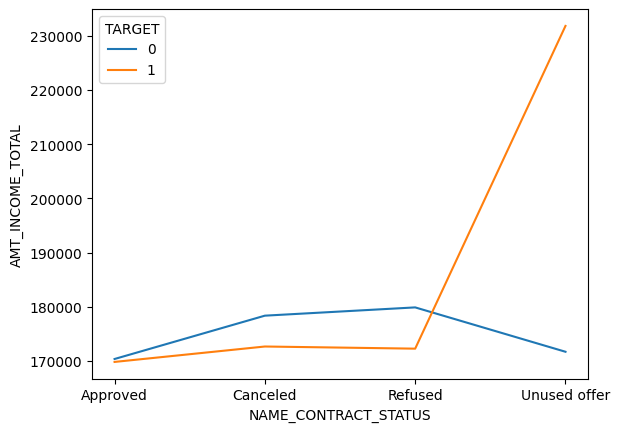

In [162]:
sns.lineplot(data=merged_data_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',hue='TARGET',ci=None)

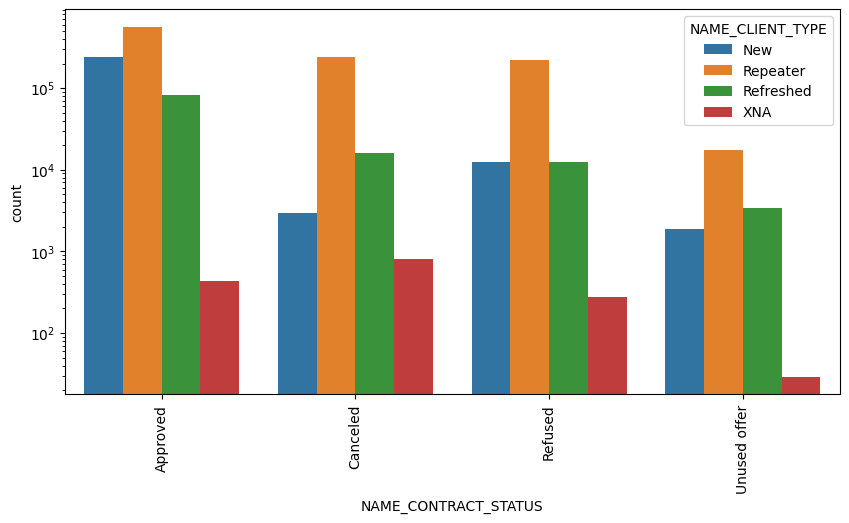

In [163]:
plt.figure(figsize=(10,5))

sns.countplot(data=merged_data_df,x='NAME_CONTRACT_STATUS', hue='NAME_CLIENT_TYPE')
plt.xticks(rotation=90)
plt.yscale('log')

Text(0, 0.5, 'Current defaulters')

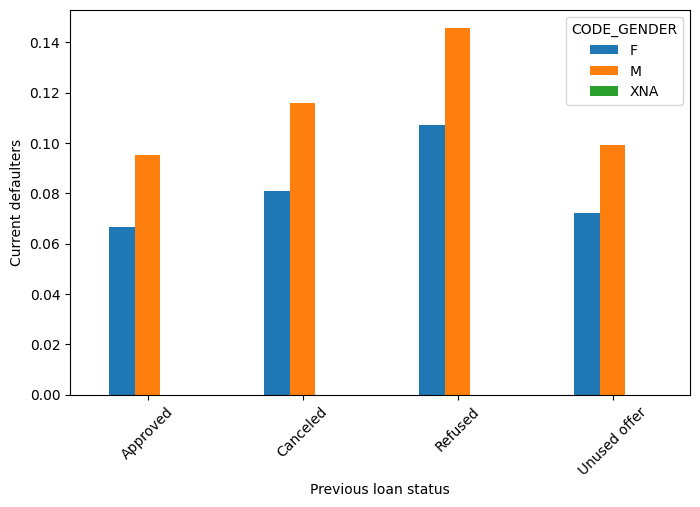

In [164]:
merged_data_df.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

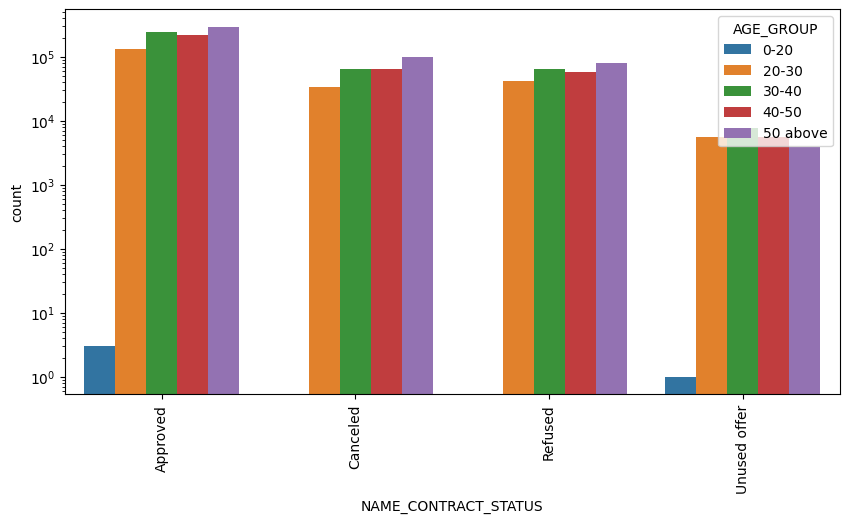

In [166]:
plt.figure(figsize=(15,5))

sns.countplot(data=merged_data_df,x='NAME_CONTRACT_STATUS', hue='AGE_GROUP')
plt.xticks(rotation=90)
plt.yscale('log')